In [2]:
# ============================
# 📦 Essential Python Imports
# ============================
import os
import gc
import warnings
warnings.filterwarnings("ignore")

# ============================
# 🧪 Data & Scientific Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime

# ============================
# 📊 Machine Learning & Forecasting
# ============================
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost import XGBRegressor

from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from scipy.optimize import minimize_scalar

# ============================
# 📈 Visualization
# ============================
import plotly.express as px

# ============================
# 🧠 Deep Learning
# ============================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# ============================
# ✅ Confirmation
# ============================
print("✅ All libraries loaded successfully.")


✅ All libraries loaded successfully.


In [3]:
import pandas as pd

# Loading the Calendar Dataset
calendar_path = "calendar.csv"
calendar = pd.read_csv(calendar_path)

# Print dataset shape
print("Calendar shape:", calendar.shape)

# Display the first 5 rows
calendar.head()


Calendar shape: (1969, 14)


date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [4]:
# 🧪 Checking for missing values, data types & descriptive stats

print("-- Missing values in calendar --")
print(calendar.isnull().sum())

print("\n-- Data types (info) --")
calendar.info()

print("\n-- Descriptive statistics --")
print(calendar.describe(include='all'))


-- Missing values in calendar --
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

-- Data types (info) --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non

In [5]:
import pandas as pd

# Loading sell_prices.csv
sell_prices_path = "sell_prices.csv"
sell_prices = pd.read_csv(sell_prices_path)

# Print dataset shape
print("Sell Prices shape:", sell_prices.shape)

# Display first 5 rows
sell_prices.head()


Sell Prices shape: (6841121, 4)


store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [6]:
# 🧪 Checking for missing values, data types & descriptive stats in sell_prices

print("-- Missing values in sell_prices --")
print(sell_prices.isnull().sum())

print("\n-- Data types (info) --")
sell_prices.info()

print("\n-- Descriptive stats for 'sell_price' --")
print(sell_prices["sell_price"].describe())


-- Missing values in sell_prices --
store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

-- Data types (info) --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB

-- Descriptive stats for 'sell_price' --
count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


In [7]:
import pandas as pd

# Loading the sales_train_evaluation.csv
sales_eval_path = "sales_train_evaluation.csv"
sales_eval = pd.read_csv(sales_eval_path)

# Check shape
print("Sales Evaluation shape:", sales_eval.shape)

# Preview first 5 rows
sales_eval.head()


Sales Evaluation shape: (30490, 1947)


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  ...  d_1932  d_1933  d_1934  d_1935  d_1936  \
0       CA    0    0    0    0  ...       2       4       0       0       0   
1       CA    0    0    0    0  ...       0       1       2       1       1   
2       CA    0    0    0    0  ...       1       0       2       0       0   
3       CA    0    0    0    0  ...       1       1       0       4       0   
4       CA    0    0    0    0  ...       0       0       0       2       1   

   d_1937  d_1938  d_1939  d_1940  d_1941  
0       0       3       3       0       1  
1       0       0       0       0       0  
2       0       2       3       0       1  
3       1       3       0       2       6  
4       0       0       2       1       0  

[5 rows x 1947 columns]

In [8]:
# 🧪 Checking missing values and data types in sales_eval

print("-- Missing values in sales_eval --")
total_missing = sales_eval.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

print("\n-- Data types (info) --")
sales_eval.info(verbose=False)


-- Missing values in sales_eval --
Total missing values: 0

-- Data types (info) --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [9]:
# 🧪 Check unique values before any reshaping or merging

print("Unique item IDs:", sales_eval["item_id"].nunique())
print("Unique store IDs:", sales_eval["store_id"].nunique())
print("Unique dept IDs:", sales_eval["dept_id"].nunique())
print("Unique category IDs:", sales_eval["cat_id"].nunique())
print("Unique state IDs:", sales_eval["state_id"].nunique())


Unique item IDs: 3049
Unique store IDs: 10
Unique dept IDs: 7
Unique category IDs: 3
Unique state IDs: 3


### **Store-by-Store Merge**
To avoid running out of memory, we'll process each store_id separately:

1. Filter sales_eval for one store.
2. Melt the subset so d_1 ... d_1941 become a "day" column and a "sales" column.
3. Merge with calendar on "d".
4. Filter sell_prices for that store and merge on [store_id, item_id, wm_yr_wk].
5. Save the result as a separate .pkl file.
6. Clear variables and move on to the next store.


In [10]:
import os
import gc
import pandas as pd
import numpy as np

# =============================
# Memory Reduction Function
# =============================
def reduce_memory_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"  Memory usage: {start_mem:.2f} MB ->", end=" ")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type not in [object, 'category']:
            df[col] = df[col].fillna(0)
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type).startswith('int'):
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            else:
                df[col] = df[col].astype(np.float32)
        else:
            if col_type == object and df[col].nunique() / len(df[col]) < 0.5:
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"{end_mem:.2f} MB (reduced by {(start_mem - end_mem)/start_mem*100:.1f}%)")
    return df

# =============================
# File Paths (Local)
# =============================
DATA_DIR = "data"
OUTPUT_DIR = "processed"
os.makedirs(OUTPUT_DIR, exist_ok=True)

sales_eval_path = os.path.join("sales_train_evaluation.csv")
calendar_path = os.path.join("calendar.csv")
sell_prices_path = os.path.join("sell_prices.csv")

# =============================
# Load Datasets
# =============================
sales_eval = pd.read_csv(sales_eval_path)
calendar = pd.read_csv(calendar_path)
sell_prices = pd.read_csv(sell_prices_path)

print("Datasets loaded successfully!")

# =============================
# Main Processing Loop
# =============================
all_stores = sales_eval["store_id"].unique()
print("Found store_ids:", all_stores)

for store in all_stores:
    print(f"\nProcessing store: {store}")

    # (1) Filter for this store
    df_store = sales_eval[sales_eval["store_id"] == store].copy()
    df_store = reduce_memory_usage(df_store)

    # (2) Melt the subset
    fixed_cols = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"]
    date_cols = [c for c in df_store.columns if c.startswith("d_")]

    df_melted_sub = pd.melt(
        df_store,
        id_vars=fixed_cols,
        value_vars=date_cols,
        var_name="d",
        value_name="sales"
    )
    del df_store
    gc.collect()

    # (3) Merge with calendar
    df_cal_sub = pd.merge(df_melted_sub, calendar, how="left", on="d")
    del df_melted_sub
    gc.collect()

    # (4) Filter sell_prices for this store
    sp_sub = sell_prices[sell_prices["store_id"] == store].copy()
    sp_sub = reduce_memory_usage(sp_sub)

    df_merged_sub = pd.merge(
        df_cal_sub,
        sp_sub,
        how="left",
        on=["store_id", "item_id", "wm_yr_wk"]
    )
    del df_cal_sub, sp_sub
    gc.collect()

    df_merged_sub = reduce_memory_usage(df_merged_sub)

    # (5) Save to disk (local path)
    out_path = os.path.join(OUTPUT_DIR, f"merged_{store}.pkl")
    df_merged_sub.to_pickle(out_path)
    print(f"  Saved merged data for store={store}, shape={df_merged_sub.shape} -> {out_path}")

    # (6) Clear memory
    del df_merged_sub
    gc.collect()


Datasets loaded successfully!
Found store_ids: ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']

Processing store: CA_1
  Memory usage: 45.31 MB -> 6.52 MB (reduced by 85.6%)
  Memory usage: 26.64 MB -> 11.41 MB (reduced by 57.2%)
  Memory usage: 778.87 MB -> 180.94 MB (reduced by 76.8%)
  Saved merged data for store=CA_1, shape=(5918109, 22) -> processed\merged_CA_1.pkl

Processing store: CA_2
  Memory usage: 45.31 MB -> 5.82 MB (reduced by 87.2%)
  Memory usage: 24.31 MB -> 10.42 MB (reduced by 57.1%)
  Memory usage: 778.87 MB -> 180.94 MB (reduced by 76.8%)
  Saved merged data for store=CA_2, shape=(5918109, 22) -> processed\merged_CA_2.pkl

Processing store: CA_3
  Memory usage: 45.31 MB -> 8.92 MB (reduced by 80.3%)
  Memory usage: 26.47 MB -> 11.34 MB (reduced by 57.2%)
  Memory usage: 778.87 MB -> 180.94 MB (reduced by 76.8%)
  Saved merged data for store=CA_3, shape=(5918109, 22) -> processed\merged_CA_3.pkl

Processing store: CA_4
  Memory usage: 45.31 M

## Load merged data

### Subtask:
Load the merged data for one or more stores to perform the EDA.


In [11]:
import pandas as pd
import gc
import glob
import os

# Folder containing all merged pickle files
PROCESSED_DIR = "processed"

# Automatically get all pickle files in the folder
merged_files = glob.glob(os.path.join(PROCESSED_DIR, "merged_*.pkl"))

# Initialize an empty list to store the loaded DataFrames
list_of_dfs = []

# Iterate and load each pickle file
for file_path in merged_files:
    print(f"Loading {file_path}...")
    df_sub = pd.read_pickle(file_path)
    print(f"  Shape of loaded data: {df_sub.shape}")
    list_of_dfs.append(df_sub)
    # Free memory
    del df_sub
    gc.collect()

# Concatenate all the DataFrames
df_merged_all = pd.concat(list_of_dfs, ignore_index=True)

# Final info
print("\nShape of the final merged DataFrame:", df_merged_all.shape)

# Preview first 5 rows (notebook friendly)
df_merged_all.head()
# If using a .py script: print(df_merged_all.head())


Loading processed\merged_CA_1.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_CA_2.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_CA_3.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_CA_4.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_TX_1.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_TX_2.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_TX_3.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_WI_1.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_WI_2.pkl...
  Shape of loaded data: (5918109, 22)
Loading processed\merged_WI_3.pkl...
  Shape of loaded data: (5918109, 22)

Shape of the final merged DataFrame: (59181090, 22)


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  ... month  year  event_name_1  \
0       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
1       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
2       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
3       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
4       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   

   event_type_1 event_name_2 event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0           NaN          NaN          NaN       0       0        0         0.0  
1           NaN          NaN          NaN       0       0        0         0.0  
2           NaN          NaN          NaN       0       0        0         0.0  
3           NaN          NaN          NaN       0       0        0         0.0  
4           NaN          NaN          NaN       0       0        0         0.0  

[5 rows x 22 columns]

## Time series analysis of sales

### Subtask:
Visualize the sales trends over time for selected items or aggregates (e.g., by store, category, or state).


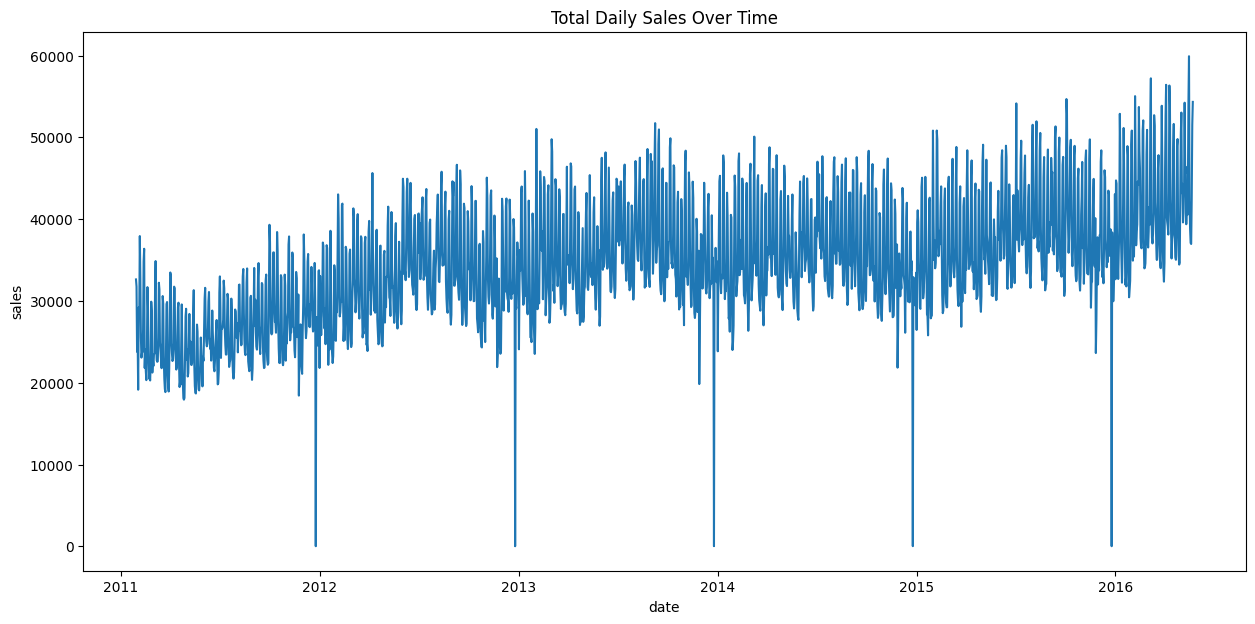

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Convert 'date' column to datetime objects
df_merged_all['date'] = pd.to_datetime(df_merged_all['date'])

# 2️⃣ Aggregate sales data by date
daily_sales = df_merged_all.groupby('date')['sales'].sum().reset_index()

# 3️⃣ Create a line plot of total daily sales over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=daily_sales, x='date', y='sales')

# 4️⃣ Add a title to the plot
plt.title("Total Daily Sales Over Time")

# 5️⃣ Display the plot
plt.show()


## Analyze categorical variables

### Subtask:
Explore the distributions of categorical variables like `item_id`, `dept_id`, `cat_id`, `store_id`, and `state_id`.



--- item_id ---
Number of unique values: 3049
Top 5 most frequent values:
item_id
FOODS_1_001    19410
FOODS_1_002    19410
FOODS_1_003    19410
FOODS_1_004    19410
FOODS_1_005    19410
Name: count, dtype: int64

--- dept_id ---
Number of unique values: 7
Top 5 most frequent values:
dept_id
FOODS_3        15974430
HOUSEHOLD_1    10326120
HOUSEHOLD_2     9996150
HOBBIES_1       8074560
FOODS_2         7725180
Name: count, dtype: int64

--- cat_id ---
Number of unique values: 3
Top 5 most frequent values:
cat_id
FOODS        27892170
HOUSEHOLD    20322270
HOBBIES      10966650
Name: count, dtype: int64

--- store_id ---
Number of unique values: 10
Top 5 most frequent values:
store_id
CA_1    5918109
CA_2    5918109
CA_3    5918109
CA_4    5918109
TX_1    5918109
Name: count, dtype: int64

--- state_id ---
Number of unique values: 3
Top 5 most frequent values:
state_id
CA    23672436
TX    17754327
WI    17754327
Name: count, dtype: int64


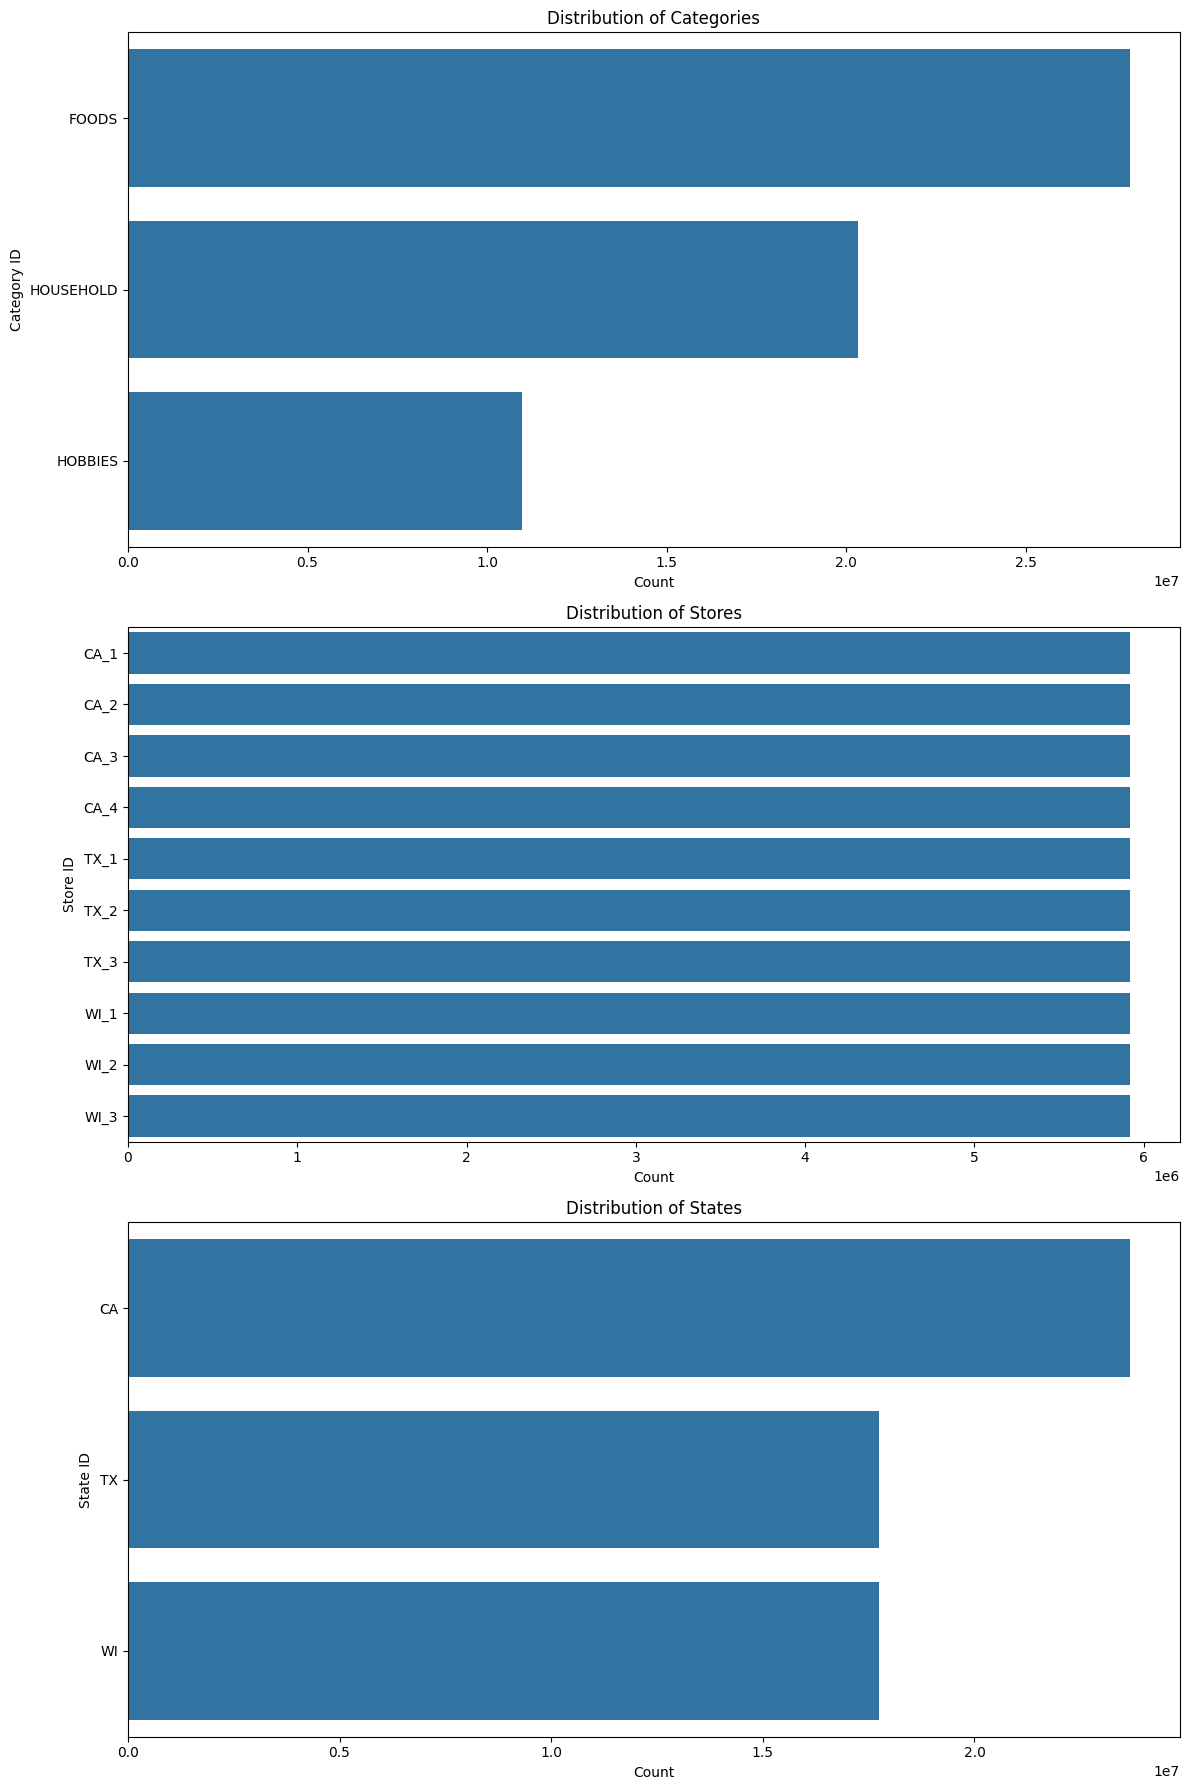

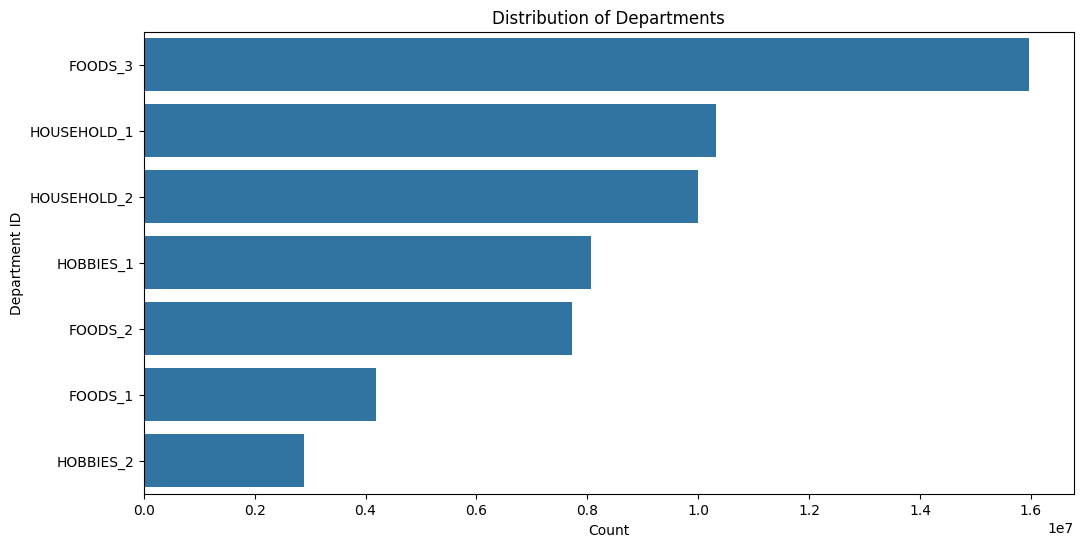

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = ["item_id", "dept_id", "cat_id", "store_id", "state_id"]

# Print unique values and top 5 frequencies
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Number of unique values: {df_merged_all[col].nunique()}")
    print(f"Top 5 most frequent values:\n{df_merged_all[col].value_counts().head()}")

# Create count plots for selected categorical variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

sns.countplot(
    data=df_merged_all, 
    y='cat_id', 
    ax=axes[0], 
    order=df_merged_all['cat_id'].value_counts().index
)
axes[0].set_title('Distribution of Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category ID')

sns.countplot(
    data=df_merged_all, 
    y='store_id', 
    ax=axes[1], 
    order=df_merged_all['store_id'].value_counts().index
)
axes[1].set_title('Distribution of Stores')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Store ID')

sns.countplot(
    data=df_merged_all, 
    y='state_id', 
    ax=axes[2], 
    order=df_merged_all['state_id'].value_counts().index
)
axes[2].set_title('Distribution of States')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('State ID')

plt.tight_layout()
plt.show()

# Separate count plot for departments
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_merged_all, 
    y='dept_id', 
    order=df_merged_all['dept_id'].value_counts().index
)
plt.title('Distribution of Departments')
plt.xlabel('Count')
plt.ylabel('Department ID')
plt.show()


## Analyze event impacts

### Subtask:
Investigate the impact of `event_name_1`, `event_type_1`, `event_name_2`, and `event_type_2` on sales.



-- Average Sales by event_name_1 --
event_name_1
LaborDay               1.382571
OrthodoxEaster         1.352181
SuperBowl              1.342211
Easter                 1.296084
Father's day           1.199147
Pesach End             1.189898
Mother's day           1.184356
Purim End              1.179305
Eid al-Fitr            1.156694
ColumbusDay            1.153322
VeteransDay            1.151814
Ramadan starts         1.140689
no_name                1.135105
EidAlAdha              1.131650
PresidentsDay          1.129758
Cinco De Mayo          1.128613
IndependenceDay        1.105635
NBAFinalsEnd           1.100827
ValentinesDay          1.098579
StPatricksDay          1.097398
Chanukah End           1.096320
MartinLutherKingDay    1.094739
OrthodoxChristmas      1.093611
MemorialDay            1.072470
NBAFinalsStart         1.045405
LentStart              1.007773
Halloween              0.985877
LentWeek2              0.975631
NewYear                0.845143
Thanksgiving          

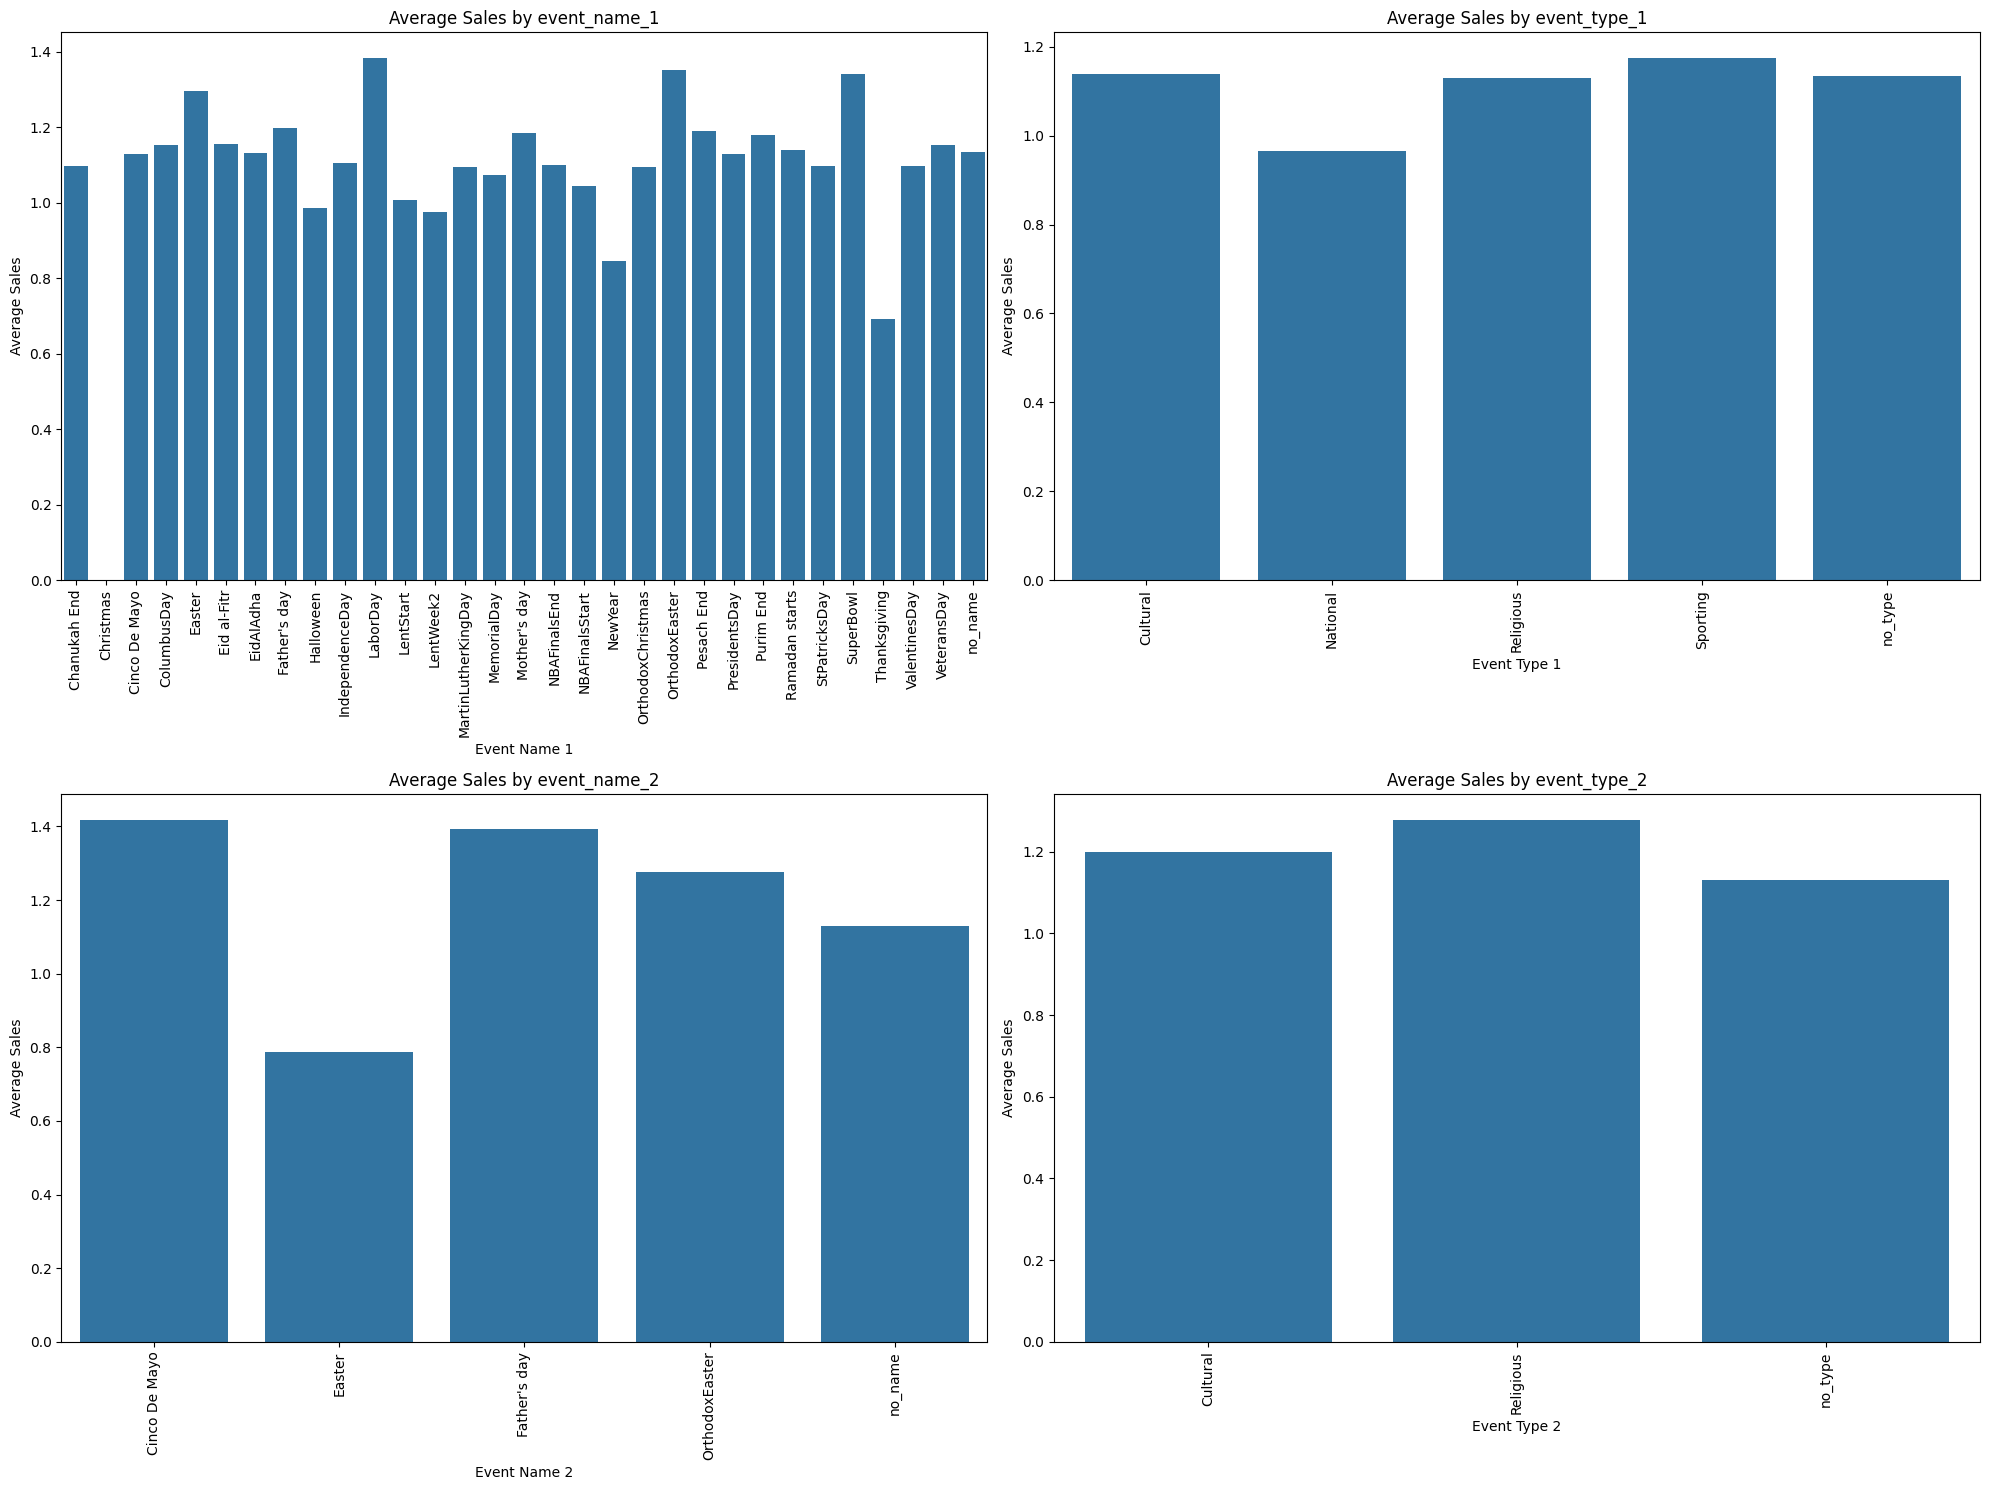

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of event columns
event_cols = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

# 1️⃣ Add new categories and replace missing values
for col in event_cols:
    # Ensure the column is categorical
    if not pd.api.types.is_categorical_dtype(df_merged_all[col]):
        df_merged_all[col] = df_merged_all[col].astype('category')
    
    new_category = f'no_{col.split("_")[1]}'
    if new_category not in df_merged_all[col].cat.categories:
        df_merged_all[col] = df_merged_all[col].cat.add_categories(new_category)
    
    df_merged_all[col] = df_merged_all[col].fillna(new_category)

# 2️⃣ Compute average sales per event/event type
event_name_1_sales = df_merged_all.groupby('event_name_1')['sales'].mean().sort_values(ascending=False)
event_type_1_sales = df_merged_all.groupby('event_type_1')['sales'].mean().sort_values(ascending=False)
event_name_2_sales = df_merged_all.groupby('event_name_2')['sales'].mean().sort_values(ascending=False)
event_type_2_sales = df_merged_all.groupby('event_type_2')['sales'].mean().sort_values(ascending=False)

# 3️⃣ Print results
print("\n-- Average Sales by event_name_1 --")
print(event_name_1_sales)
print("\n-- Average Sales by event_type_1 --")
print(event_type_1_sales)
print("\n-- Average Sales by event_name_2 --")
print(event_name_2_sales)
print("\n-- Average Sales by event_type_2 --")
print(event_type_2_sales)

# 4️⃣ Visualize average sales per event/event type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

sns.barplot(x=event_name_1_sales.index, y=event_name_1_sales.values, ax=axes[0, 0])
axes[0, 0].set_title('Average Sales by event_name_1')
axes[0, 0].set_xlabel('Event Name 1')
axes[0, 0].set_ylabel('Average Sales')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=event_type_1_sales.index, y=event_type_1_sales.values, ax=axes[0, 1])
axes[0, 1].set_title('Average Sales by event_type_1')
axes[0, 1].set_xlabel('Event Type 1')
axes[0, 1].set_ylabel('Average Sales')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x=event_name_2_sales.index, y=event_name_2_sales.values, ax=axes[1, 0])
axes[1, 0].set_title('Average Sales by event_name_2')
axes[1, 0].set_xlabel('Event Name 2')
axes[1, 0].set_ylabel('Average Sales')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=event_type_2_sales.index, y=event_type_2_sales.values, ax=axes[1, 1])
axes[1, 1].set_title('Average Sales by event_type_2')
axes[1, 1].set_xlabel('Event Type 2')
axes[1, 1].set_ylabel('Average Sales')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## Analyze snap day impacts

### Subtask:
Examine the effect of SNAP days (`snap_CA`, `snap_TX`, `snap_WI`) on sales for the respective states.



-- Average Sales by State (CA) and SNAP Status --
  state_id  snap_CA     sales
0       CA        0  1.201849
1       CA        1  1.297427

-- Average Sales by State (TX) and SNAP Status --
  state_id  snap_TX     sales
2       TX        0  1.043386
3       TX        1  1.163607


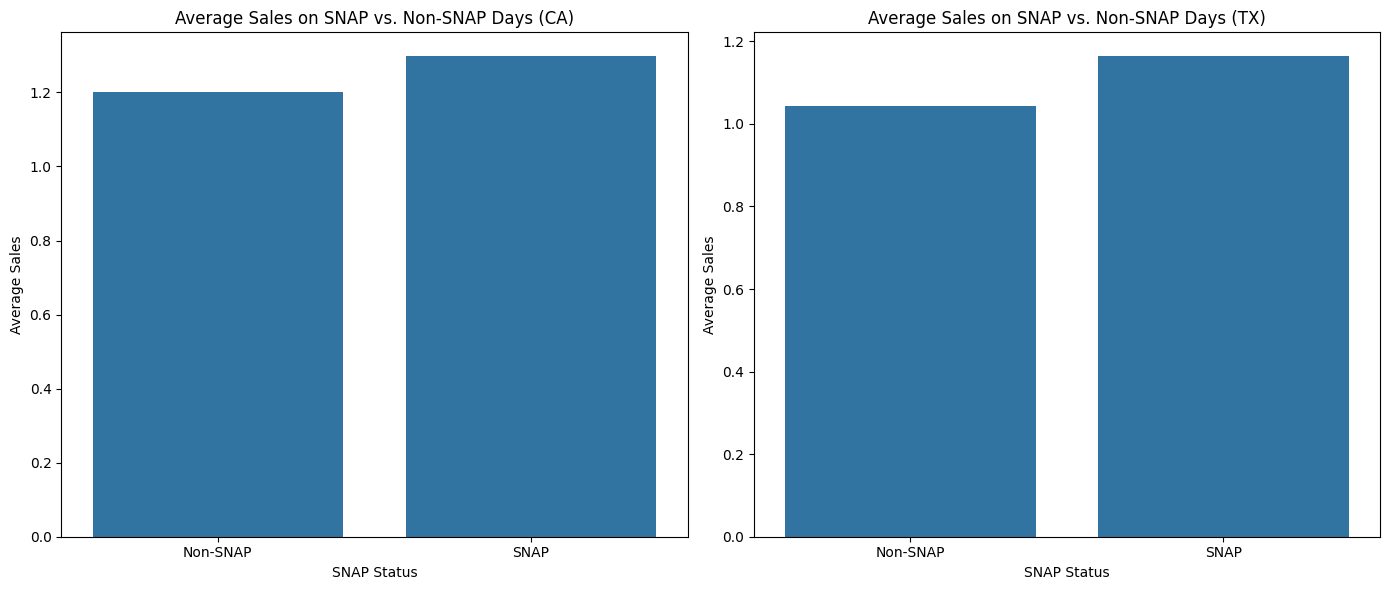

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Examine the effect of SNAP days

# Average sales by state and SNAP status for CA
snap_sales_ca = df_merged_all.groupby(['state_id', 'snap_CA'])['sales'].mean().reset_index()
print("\n-- Average Sales by State (CA) and SNAP Status --")
print(snap_sales_ca[snap_sales_ca['state_id'] == 'CA'])

# Average sales by state and SNAP status for TX
snap_sales_tx = df_merged_all.groupby(['state_id', 'snap_TX'])['sales'].mean().reset_index()
print("\n-- Average Sales by State (TX) and SNAP Status --")
print(snap_sales_tx[snap_sales_tx['state_id'] == 'TX'])

# 2️⃣ Create bar plots for SNAP vs. non-SNAP sales for each state
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for CA
sns.barplot(
    data=snap_sales_ca[snap_sales_ca['state_id'] == 'CA'], 
    x='snap_CA', 
    y='sales', 
    ax=axes[0]
)
axes[0].set_title('Average Sales on SNAP vs. Non-SNAP Days (CA)')
axes[0].set_xlabel('SNAP Status')
axes[0].set_ylabel('Average Sales')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-SNAP', 'SNAP'])

# Plot for TX
sns.barplot(
    data=snap_sales_tx[snap_sales_tx['state_id'] == 'TX'], 
    x='snap_TX', 
    y='sales', 
    ax=axes[1]
)
axes[1].set_title('Average Sales on SNAP vs. Non-SNAP Days (TX)')
axes[1].set_xlabel('SNAP Status')
axes[1].set_ylabel('Average Sales')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Non-SNAP', 'SNAP'])

plt.tight_layout()
plt.show()


## Analyze sell price trends

### Subtask:
Visualize how sell prices change over time for selected items.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Select a few item_ids to visualize price trends
selected_items = ['HOBBIES_1_001', 'FOODS_3_090', 'HOUSEHOLD_1_008']

# 2️⃣ Filter the df_merged_all DataFrame for selected items
df_selected_items = df_merged_all[df_merged_all['item_id'].isin(selected_items)].copy()

# Ensure 'date' is in datetime format
df_selected_items['date'] = pd.to_datetime(df_selected_items['date'])

# 3️⃣ Create a line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_selected_items, x='date', y='sell_price', hue='item_id')

# 4️⃣ Add title and labels
plt.title("Sell Price Trends Over Time for Selected Items")
plt.xlabel("Date")
plt.ylabel("Sell Price")

# 5️⃣ Display the plot
plt.show()


## Analyze relationship between sales and price

### Subtask:
Explore the relationship between sales and sell price.


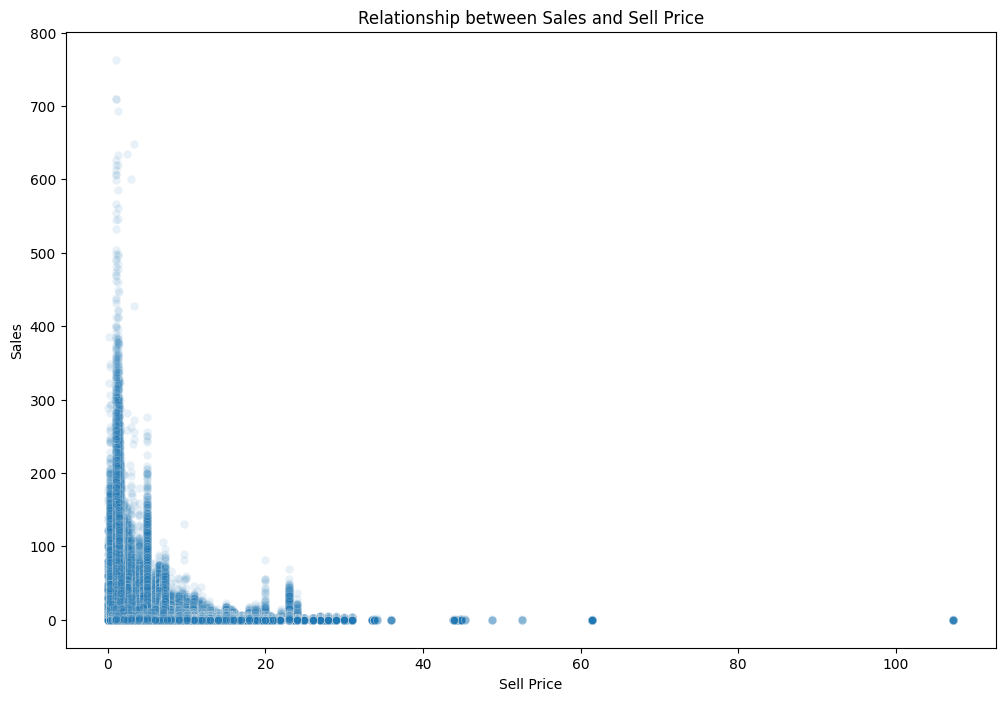

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Scatter plot to visualize relationship between sell_price and sales
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_merged_all,
    x='sell_price',
    y='sales',
    alpha=0.1  # makes dense points more visible
)

# 2️⃣ Add title and axis labels
plt.title("Relationship between Sales and Sell Price")
plt.xlabel("Sell Price")
plt.ylabel("Sales")

# 3️⃣ Display the plot
plt.show()


## Analyze day of week and month effects

> Add blockquote



### Subtask:
Investigate if there are patterns in sales based on the day of the week or month.


In [18]:
import pandas as pd

# 1️⃣ Extract day of week and month from date
df_merged_all['day_of_week'] = df_merged_all['date'].dt.day_name()
df_merged_all['month'] = df_merged_all['date'].dt.month_name()

# 2️⃣ Calculate average sales
average_sales_by_weekday = df_merged_all.groupby('day_of_week')['sales'].mean()
average_sales_by_month = df_merged_all.groupby('month')['sales'].mean()

# 3️⃣ Display results
print("Average Sales by Day of the Week:")
print(average_sales_by_weekday)

print("\nAverage Sales by Month:")
print(average_sales_by_month)


Average Sales by Day of the Week:
day_of_week
Friday       1.126844
Monday       1.082156
Saturday     1.367867
Sunday       1.354675
Thursday     0.994459
Tuesday      1.000344
Wednesday    0.988207
Name: sales, dtype: float64

Average Sales by Month:
month
April        1.129294
August       1.178965
December     1.081681
February     1.136262
January      1.109621
July         1.151932
June         1.147964
March        1.126266
May          1.117914
November     1.091861
October      1.138520
September    1.163636
Name: sales, dtype: float64


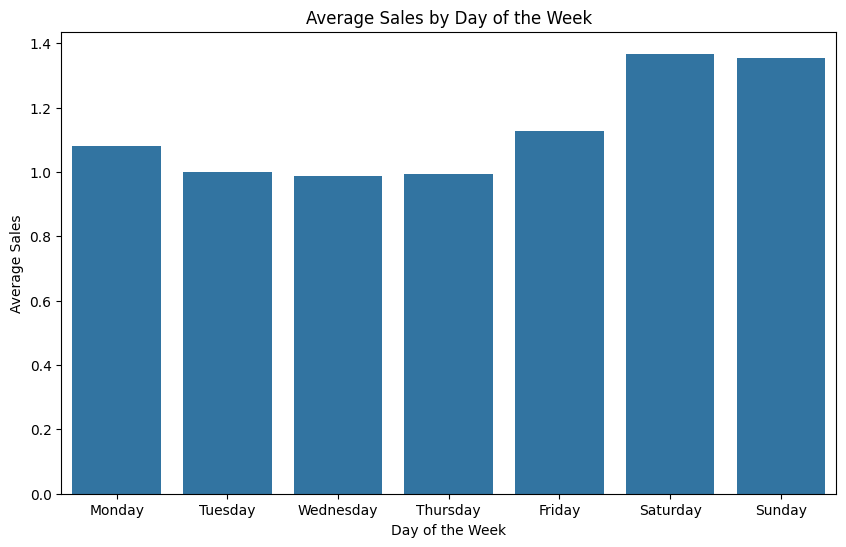

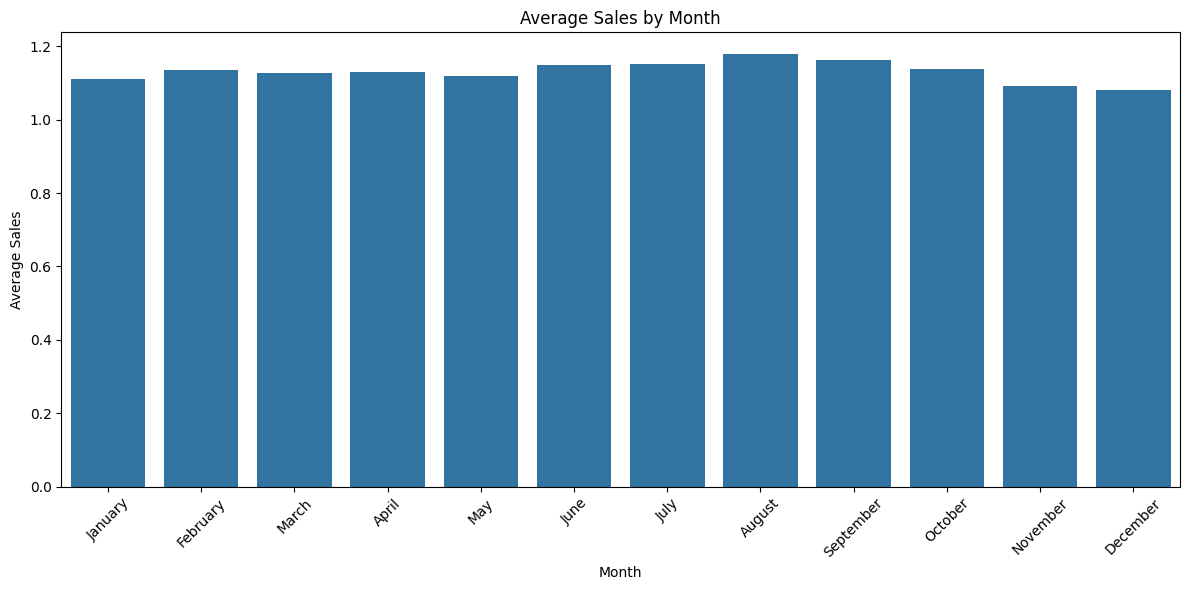

In [19]:
# Define the order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create bar plot for average sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sales_by_weekday.index, y=average_sales_by_weekday.values, order=day_order)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()

# Define the order for months (optional, but good practice)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create bar plot for average sales by month
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_month.index, y=average_sales_by_month.values, order=month_order)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze sales by store, category, and department

### Subtask:
Visualize and compare sales across different stores, categories, and departments.


Average Sales by Store:
  store_id     sales
0     CA_1  1.323438
1     CA_2  0.983151
2     CA_3  1.920130
3     CA_4  0.706735
4     TX_1  0.961933
5     TX_2  1.238511
6     TX_3  1.048636
7     WI_1  0.889052
8     WI_2  1.131778
9     WI_3  1.105515

Average Sales by Category:
      cat_id     sales
0      FOODS  1.646427
1    HOBBIES  0.569058
2  HOUSEHOLD  0.726498

Average Sales by Department:
       dept_id     sales
0      FOODS_1  1.238003
1      FOODS_2  1.009041
2      FOODS_3  2.061858
3    HOBBIES_1  0.705799
4    HOBBIES_2  0.187284
5  HOUSEHOLD_1  1.135262
6  HOUSEHOLD_2  0.304241


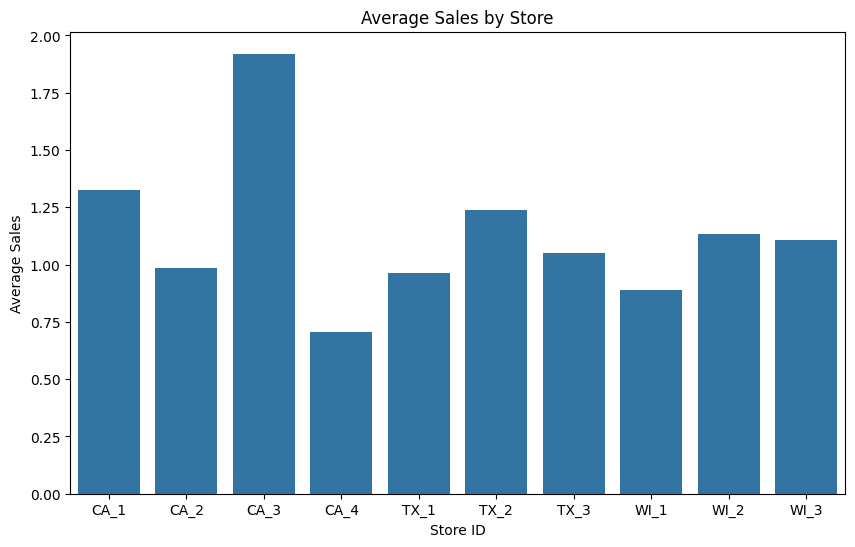

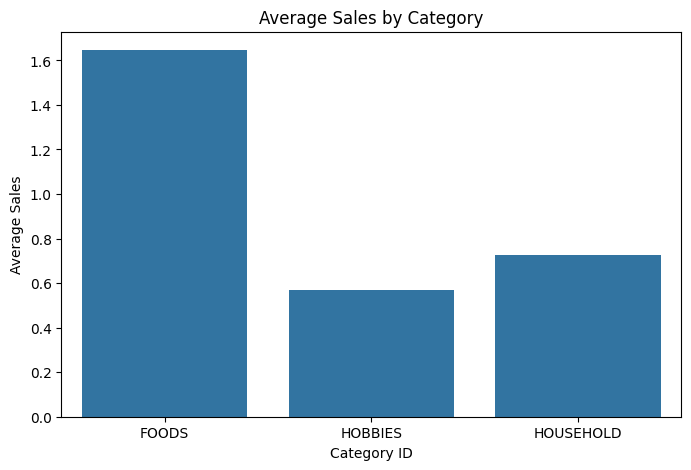

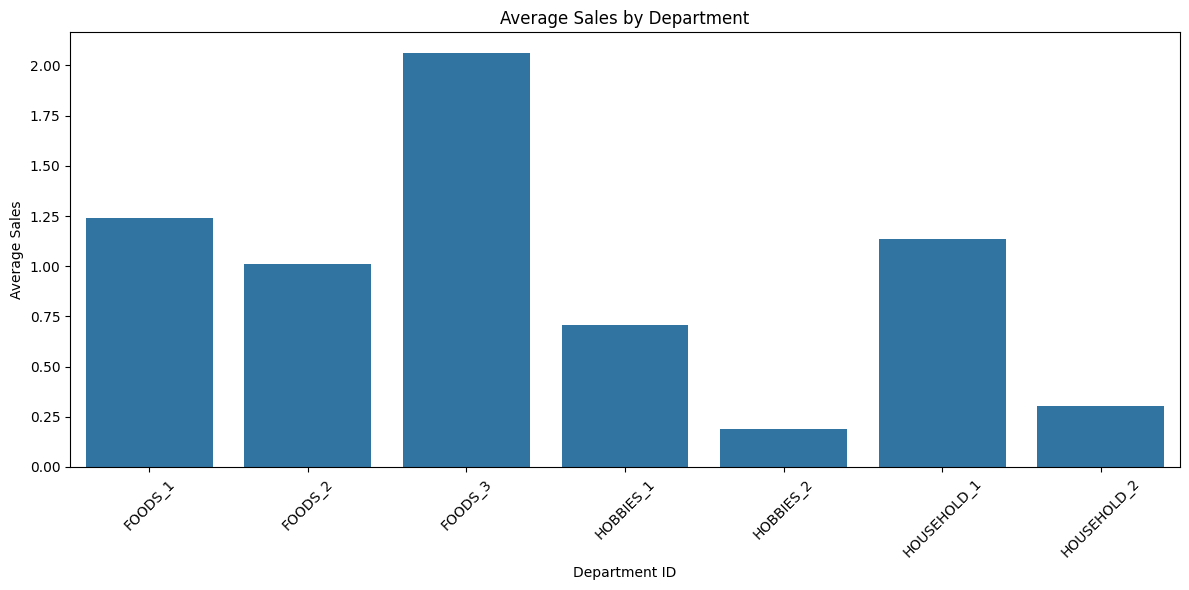

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Average sales by store
average_sales_by_store = df_merged_all.groupby('store_id')['sales'].mean().reset_index()
print("Average Sales by Store:")
print(average_sales_by_store)

# 2️⃣ Average sales by category
average_sales_by_category = df_merged_all.groupby('cat_id')['sales'].mean().reset_index()
print("\nAverage Sales by Category:")
print(average_sales_by_category)

# 3️⃣ Average sales by department
average_sales_by_department = df_merged_all.groupby('dept_id')['sales'].mean().reset_index()
print("\nAverage Sales by Department:")
print(average_sales_by_department)

# 4️⃣ Bar plot for average sales by store
plt.figure(figsize=(10, 6))
sns.barplot(x='store_id', y='sales', data=average_sales_by_store)
plt.title('Average Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Average Sales')
plt.show()

# 5️⃣ Bar plot for average sales by category
plt.figure(figsize=(8, 5))
sns.barplot(x='cat_id', y='sales', data=average_sales_by_category)
plt.title('Average Sales by Category')
plt.xlabel('Category ID')
plt.ylabel('Average Sales')
plt.show()

# 6️⃣ Bar plot for average sales by department
plt.figure(figsize=(12, 6))
sns.barplot(x='dept_id', y='sales', data=average_sales_by_department)
plt.title('Average Sales by Department')
plt.xlabel('Department ID')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identify outliers and anomalies

### Subtask:
Look for any unusual patterns or outliers in the data.


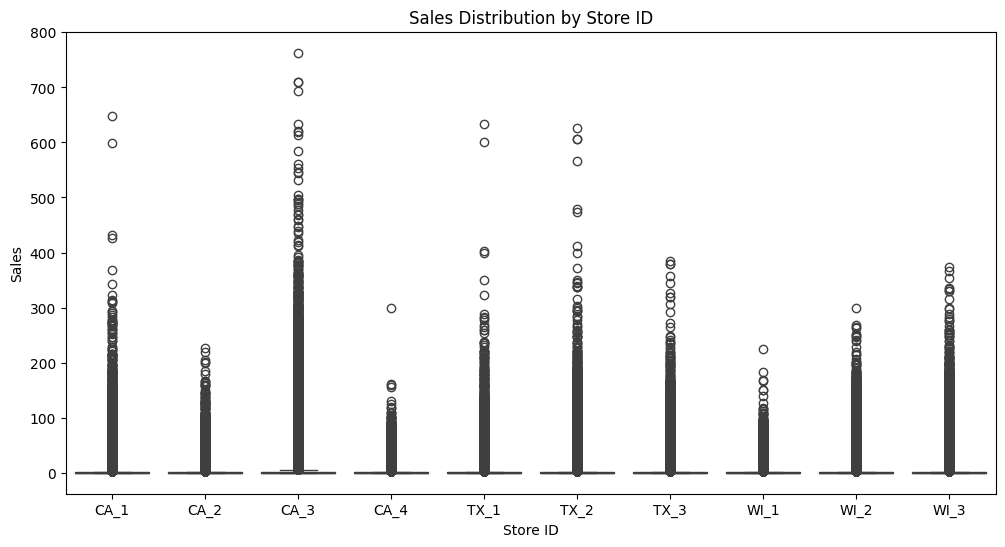

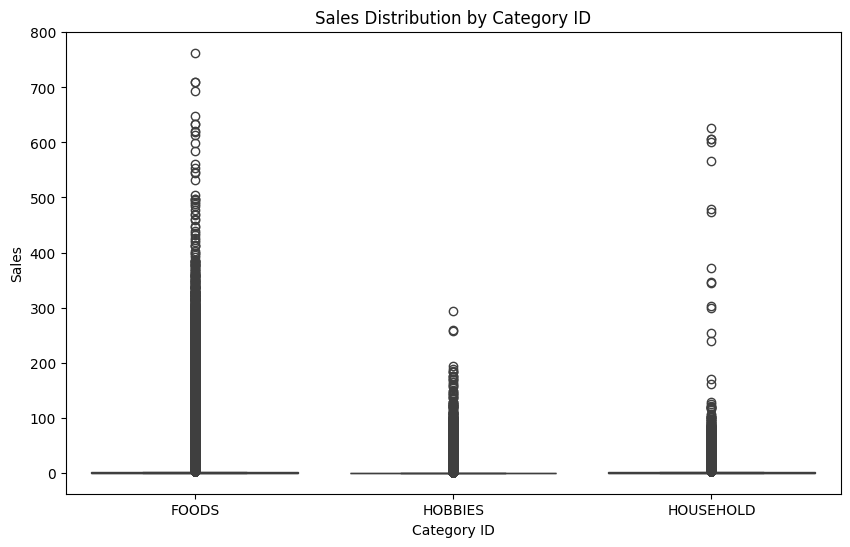

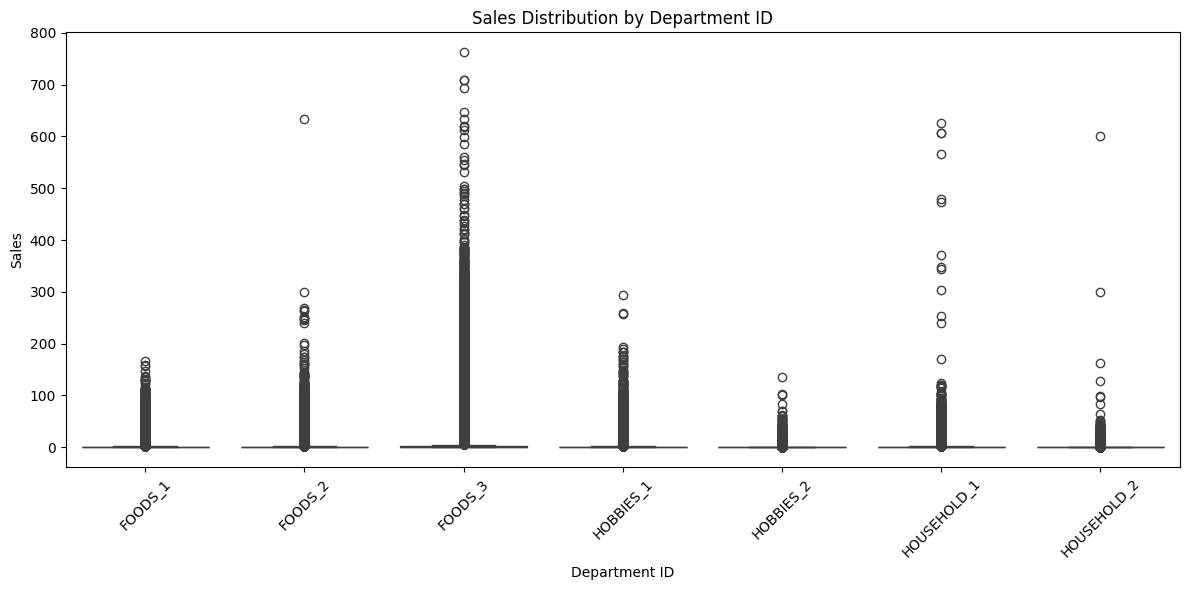

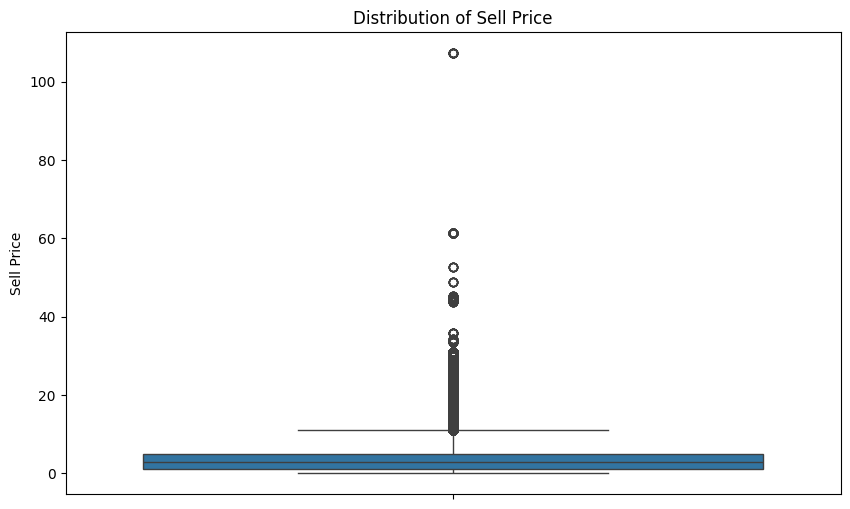

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Box plot of 'sales' by store_id
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_id', y='sales', data=df_merged_all)
plt.title('Sales Distribution by Store ID')
plt.xlabel('Store ID')
plt.ylabel('Sales')
plt.show()

# 2️⃣ Box plot of 'sales' by cat_id
plt.figure(figsize=(10, 6))
sns.boxplot(x='cat_id', y='sales', data=df_merged_all)
plt.title('Sales Distribution by Category ID')
plt.xlabel('Category ID')
plt.ylabel('Sales')
plt.show()

# 3️⃣ Box plot of 'sales' by dept_id
plt.figure(figsize=(12, 6))
sns.boxplot(x='dept_id', y='sales', data=df_merged_all)
plt.title('Sales Distribution by Department ID')
plt.xlabel('Department ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4️⃣ Box plot of 'sell_price' to examine outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y='sell_price', data=df_merged_all)
plt.title('Distribution of Sell Price')
plt.ylabel('Sell Price')
plt.show()


## Summary:

### Data Analysis Key Findings

*   The dataset contains sales data for two stores (CA\_1 and TX\_1) with a total of 11,836,218 rows and 22 columns.
*   Total daily sales show a clear increasing trend over time with noticeable seasonality.
*   The dataset has a large number of unique items (3049), while other categorical variables like department, category, store, and state have significantly fewer unique values.
*   The `FOODS` category and the `FOODS_3` department are the most frequent in the dataset.
*   The distribution of data across stores and states is perfectly balanced between the two stores (CA\_1 and TX\_1) and two states (CA and TX).
*   Certain events, such as OrthodoxEaster, Easter, and LaborDay, are associated with higher average sales, while Christmas, Thanksgiving, and NewYear are associated with lower average sales.
*   Sporting and Cultural events tend to have slightly higher average sales compared to Religious and National events.
*   SNAP days have a positive impact on average sales in both California and Texas.
*   Sell prices for selected items show fluctuations over time.
*   A scatter plot of sales versus sell price suggests a general inverse relationship, where higher prices are associated with lower sales, although there is significant variability.
*   Sales are significantly higher on weekends (Saturday and Sunday) compared to weekdays.
*   Average sales show some variation by month, with August and July having slightly higher averages.
*   Average sales vary significantly across stores, categories, and departments, with CA\_1, FOODS, and FOODS\_3 showing the highest average sales in their respective groups.
*   Box plots indicate the presence of outliers in sales distribution across stores, categories, and departments, as well as in the distribution of sell prices.

### Insights or Next Steps

*   The identified seasonality and event impacts suggest that these factors should be strongly considered in any sales forecasting model.
*   The significant differences in sales performance across stores, categories, and departments indicate that a granular approach to sales analysis and forecasting at these levels would be beneficial.


In [22]:
import pandas as pd

# 1️⃣ Load merged data for store CA_1
df_ca1 = pd.read_pickle("processed/merged_CA_1.pkl")  # adjust path if saved in 'processed/' folder

print("Shape of df_ca1:", df_ca1.shape)

# 2️⃣ Display the first 3 rows
print("\nFirst 3 rows of df_ca1:")
print(df_ca1.head(3))

# 3️⃣ Check available columns
print("\nColumns in df_ca1:")
print(df_ca1.columns.tolist())


Shape of df_ca1: (5918109, 22)

First 3 rows of df_ca1:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  ... month  year  event_name_1  \
0       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
1       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   
2       CA  d_1      0  2011-01-29     11101  ...     1  2011           NaN   

   event_type_1 event_name_2 event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0           NaN          NaN          NaN       0       0        0         0.0  
1           NaN          NaN          NaN       0       0        0         0.0  
2           NaN          NaN          NaN       0       0      

In [23]:
import pandas as pd

# 1️⃣ Convert "d" (like "d_1") into an integer day index
df_ca1["d_num"] = df_ca1["d"].str[2:].astype(int)

print("Added 'd_num' column. First few values:")
print(df_ca1[["d", "d_num"]].head(5))

# 2️⃣ Take a sample of 100,000 rows for faster exploration
df_ca1_sample = df_ca1.sample(100_000, random_state=42)

print("\nSampled 100,000 rows. Shape:", df_ca1_sample.shape)
print(df_ca1_sample.head(3))


Added 'd_num' column. First few values:
     d  d_num
0  d_1      1
1  d_1      1
2  d_1      1
3  d_1      1
4  d_1      1

Sampled 100,000 rows. Shape: (100000, 23)
                                      id          item_id      dept_id  \
327374   HOUSEHOLD_2_035_CA_1_evaluation  HOUSEHOLD_2_035  HOUSEHOLD_2   
812768       FOODS_1_125_CA_1_evaluation      FOODS_1_125      FOODS_1   
5539411      FOODS_3_203_CA_1_evaluation      FOODS_3_203      FOODS_3   

            cat_id store_id state_id       d  sales        date  wm_yr_wk  \
327374   HOUSEHOLD     CA_1       CA   d_108      0  2011-05-16     11116   
812768       FOODS     CA_1       CA   d_267      0  2011-10-22     11139   
5539411      FOODS     CA_1       CA  d_1817      3  2016-01-19     11551   

         ...  year  event_name_1  event_type_1  event_name_2 event_type_2  \
327374   ...  2011           NaN           NaN           NaN          NaN   
812768   ...  2011           NaN           NaN           NaN          NaN

In [24]:
import pandas as pd

# 1️⃣ Group by "date" to calculate average sales per day in the sample
avg_sales_by_date = (
    df_ca1_sample
    .groupby("date", as_index=False)["sales"]
    .mean()
    .rename(columns={"sales": "avg_sales_sample"})
)

print("Shape of avg_sales_by_date:", avg_sales_by_date.shape)
print("\nFirst 5 rows:")
print(avg_sales_by_date.head(5))

# 2️⃣ Optional: Sort by date for chronological view
avg_sales_by_date = avg_sales_by_date.sort_values("date")
print("\nFirst 5 rows after sorting by date:")
print(avg_sales_by_date.head(5))


Shape of avg_sales_by_date: (1941, 2)

First 5 rows:
         date  avg_sales_sample
0  2011-01-29          1.400000
1  2011-01-30          0.491228
2  2011-01-31          0.824561
3  2011-02-01          1.159091
4  2011-02-02          2.093023

First 5 rows after sorting by date:
         date  avg_sales_sample
0  2011-01-29          1.400000
1  2011-01-30          0.491228
2  2011-01-31          0.824561
3  2011-02-01          1.159091
4  2011-02-02          2.093023


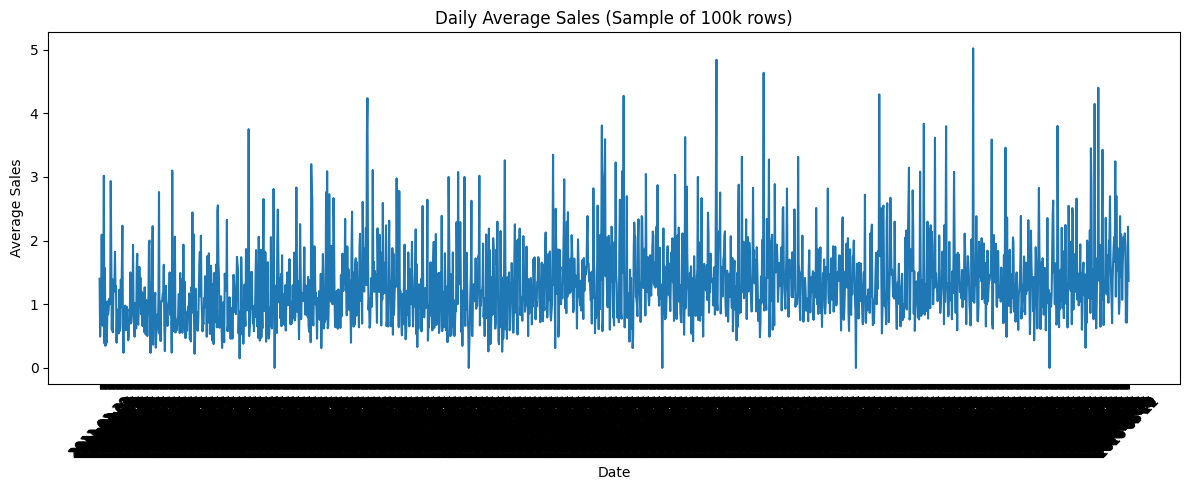

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Plot average sales over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=avg_sales_by_date, x="date", y="avg_sales_sample")
plt.title("Daily Average Sales (Sample of 100k rows)")
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# 1️⃣ Sort by 'id' and 'd_num' to prepare for lag calculation
df_ca1_sample = df_ca1_sample.sort_values(["id", "d_num"]).copy()

# 2️⃣ Create a 7-day lag feature for 'sales'
df_ca1_sample["sales_lag7"] = (
    df_ca1_sample
    .groupby("id")["sales"]
    .shift(7)
)

# 3️⃣ Inspect the first 10 rows to check the lag feature
print("Created 'sales_lag7' feature (lag=7 days). First 10 rows:")
print(df_ca1_sample[["id", "d_num", "sales", "sales_lag7"]].head(10))


Created 'sales_lag7' feature (lag=7 days). First 10 rows:
                                  id  d_num  sales  sales_lag7
199797   FOODS_1_001_CA_1_evaluation     66      4         NaN
608363   FOODS_1_001_CA_1_evaluation    200      0         NaN
1126693  FOODS_1_001_CA_1_evaluation    370      0         NaN
1187673  FOODS_1_001_CA_1_evaluation    390      1         NaN
1260849  FOODS_1_001_CA_1_evaluation    414      1         NaN
1324878  FOODS_1_001_CA_1_evaluation    435      2         NaN
1465132  FOODS_1_001_CA_1_evaluation    481      2         NaN
1510867  FOODS_1_001_CA_1_evaluation    496      0         4.0
2712173  FOODS_1_001_CA_1_evaluation    890      1         0.0
2974387  FOODS_1_001_CA_1_evaluation    976      0         0.0


In [27]:
# Handling Missing Lag Values and Splitting for a Simple Train/Validation
# 1) Fill missing values in 'sales_lag7' with 0 (a quick choice)
df_ca1_sample["sales_lag7"] = df_ca1_sample["sales_lag7"].fillna(0)

# 2) Define a cutoff, for example d_num < 1500 as "train", d_num >= 1500 as "val"
train_mask = df_ca1_sample["d_num"] < 1500
val_mask   = df_ca1_sample["d_num"] >= 1500

df_train = df_ca1_sample[train_mask].copy()
df_val   = df_ca1_sample[val_mask].copy()

print("Training set shape:", df_train.shape)
print("Validation set shape:", df_val.shape)

# Show a sample of each
print("\nSample rows from training set:")
print(df_train.sample(5))

print("\nSample rows from validation set:")
print(df_val.sample(5))

Training set shape: (77205, 24)
Validation set shape: (22795, 24)

Sample rows from training set:
                                      id          item_id      dept_id  \
1505573      FOODS_3_192_CA_1_evaluation      FOODS_3_192      FOODS_3   
2334085  HOUSEHOLD_2_505_CA_1_evaluation  HOUSEHOLD_2_505  HOUSEHOLD_2   
579867     HOBBIES_2_142_CA_1_evaluation    HOBBIES_2_142    HOBBIES_2   
2891957  HOUSEHOLD_2_410_CA_1_evaluation  HOUSEHOLD_2_410  HOUSEHOLD_2   
724319       FOODS_1_096_CA_1_evaluation      FOODS_1_096      FOODS_1   

            cat_id store_id state_id      d  sales        date  wm_yr_wk  ...  \
1505573      FOODS     CA_1       CA  d_494      0  2012-06-05     11219  ...   
2334085  HOUSEHOLD     CA_1       CA  d_766      0  2013-03-04     11306  ...   
579867     HOBBIES     CA_1       CA  d_191      0  2011-08-07     11128  ...   
2891957  HOUSEHOLD     CA_1       CA  d_949      0  2013-09-03     11332  ...   
724319       FOODS     CA_1       CA  d_238      0  

In [28]:
import pandas as pd

# 1️⃣ Combine train + validation sets for feature engineering (optional)
df_all = pd.concat([df_train, df_val], axis=0, sort=False).copy()
df_all = df_all.sort_values(["id", "d_num"]).reset_index(drop=True)

# 2️⃣ Define lags and rolling windows
lags = [7, 14, 28]
rolling_windows = [7, 28]

# 3️⃣ Group by item id
grouped = df_all.groupby("id", observed=False)

# 4️⃣ Create lag features
for lag in lags:
    df_all[f"sales_lag{lag}"] = grouped["sales"].shift(lag)

# 5️⃣ Create rolling mean features (shift by 1 to avoid using current day's value)
for w in rolling_windows:
    df_all[f"sales_rollmean{w}"] = grouped["sales"].shift(1).rolling(w, min_periods=1).mean()

# 6️⃣ Fill missing values for all new features
feature_cols = [f"sales_lag{x}" for x in lags] + [f"sales_rollmean{x}" for x in rolling_windows]
df_all[feature_cols] = df_all[feature_cols].fillna(0)

print("Created multiple lag/rolling features. Sample of columns:")
print(df_all[["id", "d_num", "sales"] + feature_cols].head(10))

# 7️⃣ Re-split into train and validation sets
df_train = df_all[df_all["d_num"] < 1500].copy()
df_val   = df_all[df_all["d_num"] >= 1500].copy()

print(f"\nTrain shape: {df_train.shape}, Validation shape: {df_val.shape}")


Created multiple lag/rolling features. Sample of columns:
                            id  d_num  sales  sales_lag7  sales_lag14  \
0  FOODS_1_001_CA_1_evaluation     66      4         0.0          0.0   
1  FOODS_1_001_CA_1_evaluation    200      0         0.0          0.0   
2  FOODS_1_001_CA_1_evaluation    370      0         0.0          0.0   
3  FOODS_1_001_CA_1_evaluation    390      1         0.0          0.0   
4  FOODS_1_001_CA_1_evaluation    414      1         0.0          0.0   
5  FOODS_1_001_CA_1_evaluation    435      2         0.0          0.0   
6  FOODS_1_001_CA_1_evaluation    481      2         0.0          0.0   
7  FOODS_1_001_CA_1_evaluation    496      0         4.0          0.0   
8  FOODS_1_001_CA_1_evaluation    890      1         0.0          0.0   
9  FOODS_1_001_CA_1_evaluation    976      0         0.0          0.0   

   sales_lag28  sales_rollmean7  sales_rollmean28  
0          0.0         0.000000          0.000000  
1          0.0         4.000000   

## Build and Train LightGBM model

In [29]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# Define our feature columns and target
feature_cols = [f"sales_lag{x}" for x in [7, 14, 28]] + [f"sales_rollmean{x}" for x in [7, 28]]
target_col = "sales"

# Combine train and validation sets to split again into train, test, and validation
df_all = pd.concat([df_train, df_val], axis=0, sort=False).copy()
df_all = df_all.sort_values(["id", "d_num"]).reset_index(drop=True)

# Define a cutoff for train/test/validation split
# Let's use d_num < 1500 for training, 1500 <= d_num < 1700 for testing, and d_num >= 1700 for validation
train_mask = df_all["d_num"] < 1500
test_mask  = (df_all["d_num"] >= 1500) & (df_all["d_num"] < 1700)
val_mask   = df_all["d_num"] >= 1700

df_train = df_all[train_mask].copy()
df_test  = df_all[test_mask].copy()
df_val   = df_all[val_mask].copy()

print(f"Training set shape: {df_train.shape}")
print(f"Testing set shape: {df_test.shape}")
print(f"Validation set shape: {df_val.shape}")

X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_test   = df_test[feature_cols]
y_test   = df_test[target_col]

X_val   = df_val[feature_cols]
y_val   = df_val[target_col]


print("\nUsing features:", feature_cols)

# Initialize and fit the LightGBM model on the training data
model_lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgbm.fit(X_train, y_train)

# Predict on the test set
pred_test = model_lgbm.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
print("\nTest RMSE:", rmse_test)

# Make predictions on the validation set
pred_val_lgbm = model_lgbm.predict(X_val)

print("\nPredictions on validation set made.")

Training set shape: (77205, 28)
Testing set shape: (10391, 28)
Validation set shape: (12404, 28)

Using features: ['sales_lag7', 'sales_lag14', 'sales_lag28', 'sales_rollmean7', 'sales_rollmean28']
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 657
[LightGBM] [Info] Number of data points in the train set: 77205, number of used features: 5
[LightGBM] [Info] Start training from score 1.282806

Test RMSE: 2.7013312785842714

Predictions on validation set made.


## Evaluate LightGBM model

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate the LightGBM model on the validation set
pred_val_lgbm = model_lgbm.predict(X_val)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, pred_val_lgbm))
print(f"LightGBM Validation RMSE: {rmse_lgbm}")

LightGBM Validation RMSE: 2.7724030041256786


## Build and Train XGBoost model

In [31]:
# Training XGBoost with Lag and Rolling Features
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error # Import mean_squared_error

# Define our feature columns and target
feature_cols = [f"sales_lag{x}" for x in [7, 14, 28]] + [f"sales_rollmean{x}" for x in [7, 28]]
target_col = "sales"

X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_val   = df_val[feature_cols]
y_val   = df_val[target_col]

print("Using features:", feature_cols)

# Initialize and fit the model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)]
    # eval_metric="rmse" # Removed eval_metric as it's not supported in this version
)

# Predict on validation
pred_val_xgb = model_xgb.predict(X_val)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print("XGBoost Validation RMSE:", rmse_xgb)

# best_iteration_ may not be available if early stopping is not used
# print("Best iteration:", model.best_iteration_)

Using features: ['sales_lag7', 'sales_lag14', 'sales_lag28', 'sales_rollmean7', 'sales_rollmean28']
[0]	validation_0-rmse:3.41835
[1]	validation_0-rmse:3.25954
[2]	validation_0-rmse:3.12499
[3]	validation_0-rmse:3.03069
[4]	validation_0-rmse:2.95020
[5]	validation_0-rmse:2.88551
[6]	validation_0-rmse:2.82962
[7]	validation_0-rmse:2.78683
[8]	validation_0-rmse:2.75421
[9]	validation_0-rmse:2.72911
[10]	validation_0-rmse:2.70758
[11]	validation_0-rmse:2.69361
[12]	validation_0-rmse:2.68610
[13]	validation_0-rmse:2.68141
[14]	validation_0-rmse:2.67914
[15]	validation_0-rmse:2.67108
[16]	validation_0-rmse:2.67106
[17]	validation_0-rmse:2.67435
[18]	validation_0-rmse:2.68203
[19]	validation_0-rmse:2.67922
[20]	validation_0-rmse:2.67911
[21]	validation_0-rmse:2.68071
[22]	validation_0-rmse:2.68225
[23]	validation_0-rmse:2.68388
[24]	validation_0-rmse:2.68490
[25]	validation_0-rmse:2.69178
[26]	validation_0-rmse:2.69450
[27]	validation_0-rmse:2.69810
[28]	validation_0-rmse:2.70277
[29]	valida

## Evaluate XGBoost model

In [32]:
# Predict on validation
pred_val_xgb = model_xgb.predict(X_val)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print("XGBoost Validation RMSE:", rmse_xgb)

XGBoost Validation RMSE: 2.8976967577084025


## Build and Train Random Forest Regressor model

In [33]:
# Training RandomForest with Lag and Rolling Features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define our feature columns and target
feature_cols = [f"sales_lag{x}" for x in [7, 14, 28]] + [f"sales_rollmean{x}" for x in [7, 28]]
target_col = "sales"

X_train = df_train[feature_cols]
y_train = df_train[target_col]

X_val   = df_val[feature_cols]
y_val   = df_val[target_col]

print("Using features:", feature_cols)

# Initialize and fit the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train, y_train)

# Predict on validation
pred_val_rf = model_rf.predict(X_val)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_val, pred_val_rf))
print("RandomForest Validation RMSE:", rmse_rf)

Using features: ['sales_lag7', 'sales_lag14', 'sales_lag28', 'sales_rollmean7', 'sales_rollmean28']
RandomForest Validation RMSE: 3.0128676810921062


## Evaluate RandomForest model

In [34]:
# Predict on validation
pred_val_rf = model_rf.predict(X_val)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_val, pred_val_rf))
print("RandomForest Validation RMSE:", rmse_rf)

RandomForest Validation RMSE: 3.0128676810921062


## Build and Train LSTM model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Reshape the data for LSTM input (samples, time steps, features)
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_train_lstm = y_train.values

X_val_lstm = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val_lstm = y_val.values


# 1. Define the LSTM model
model_lstm = Sequential()

# 2. Add an LSTM layer
# The input shape is (time steps, number of features)
model_lstm.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2)) # Add dropout for regularization

# 3. Add a Dense layer for the output
model_lstm.add(Dense(units=1))

# 4. Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 5. Print the model summary
model_lstm.summary()

# Train the LSTM model
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=50, # Use 50 epochs as specified
    batch_size=32, # Use 32 as specified batch size
    validation_split=0.2 # Use validation split of 0.2
)

print("\nLSTM model training complete.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,251 (43.95 KB)

 Trainable params: 11,251 (43.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 13.3621 - val_loss: 1.0803
Epoch 2/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 12.0529 - val_loss: 1.0723
Epoch 3/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.8249 - val_loss: 1.0547
Epoch 4/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.5931 - val_loss: 1.0816
Epoch 5/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.4736 - val_loss: 1.0708
Epoch 6/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.4126 - val_loss: 1.0692
Epoch 7/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3870 - val_loss: 1.1305
Epoch 8/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3082 - val_loss: 1.0439
Epoch 9/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11.2827 - val_loss: 1.0574
Epoch 10/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 11.2960 - val_loss: 1.1124
Epoch 11/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 11.2848 - val_loss: 1.0503
Epoch 12/50
1931/19

## Evaluate LSTM model

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate LSTM model
pred_val_lstm = model_lstm.predict(X_val_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_val_lstm, pred_val_lstm))
print(f"LSTM Validation RMSE: {rmse_lstm}")

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
LSTM Validation RMSE: 2.714102532723476


## Build and Train Bidirectional LSTM model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
import numpy as np

# Reshape the data for LSTM input (samples, time steps, features)
# Using the same reshaping as for the standard LSTM and GRU models
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_train_lstm = y_train.values

X_val_lstm = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val_lstm = y_val.values


# 1. Define the Bidirectional LSTM model
model_bi_lstm = Sequential()

# 2. Add a Bidirectional LSTM layer
# The input shape is (time steps, number of features)
model_bi_lstm.add(Bidirectional(LSTM(units=50, return_sequences=False), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_bi_lstm.add(Dropout(0.2)) # Add dropout for regularization

# 3. Add a Dense layer for the output
model_bi_lstm.add(Dense(units=1))

# 4. Compile the model
model_bi_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 5. Print the model summary
model_bi_lstm.summary()

# Train the Bidirectional LSTM model
history_bi_lstm = model_bi_lstm.fit(
    X_train_lstm, y_train_lstm,
    epochs=50, # Use 50 epochs as specified
    batch_size=32, # Use 32 as specified batch size
    validation_split=0.2 # Use validation split of 0.2
)

print("\nBidirectional LSTM model training complete.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 100)            │        22,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,501 (87.89 KB)

 Trainable params: 22,501 (87.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 12.8207 - val_loss: 1.1272
Epoch 2/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.7166 - val_loss: 1.1141
Epoch 3/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.5758 - val_loss: 1.0852
Epoch 4/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3591 - val_loss: 1.1970
Epoch 5/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3197 - val_loss: 1.0495
Epoch 6/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3204 - val_loss: 1.0600
Epoch 7/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2681 - val_loss: 1.0980
Epoch 8/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 11.2371 - val_loss: 1.1469
Epoch 9/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2320 - val_loss: 1.0853
Epoch 10/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2396 - val_loss: 1.0539
Epoch 11/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2387 - val_loss: 1.0839
Epoch 12/50
1931/19

## Evaluate Bidirectional LSTM model

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate Bidirectional LSTM model
pred_val_bi_lstm = model_bi_lstm.predict(X_val_lstm)
rmse_bi_lstm = np.sqrt(mean_squared_error(y_val_lstm, pred_val_bi_lstm))
print(f"Bidirectional LSTM Validation RMSE: {rmse_bi_lstm}")

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Bidirectional LSTM Validation RMSE: 2.6877685235298596


## Build and Train GRU model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout # Ensure all necessary layers are imported
import numpy as np

# Reshape the data for GRU input (samples, time steps, features) - using the same reshaping as LSTM
X_train_gru = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
y_train_gru = y_train.values

X_val_gru = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
y_val_gru = y_val.values


# 1. Define the GRU model
model_gru = Sequential()

# 2. Add a GRU layer
# The input shape is (time steps, number of features)
model_gru.add(GRU(units=50, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
model_gru.add(Dropout(0.2)) # Add dropout for regularization

# 3. Add a Dense layer for the output
model_gru.add(Dense(units=1))

# 4. Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# 5. Print the model summary
model_gru.summary()

# Train the GRU model
history_gru = model_gru.fit(
    X_train_gru, y_train_gru,
    epochs=50, # Use 50 epochs as specified
    batch_size=32, # Use 32 as specified batch size
    validation_split=0.2 # Use validation split of 0.2
)

print("\nGRU model training complete.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 50)             │         8,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,601 (33.60 KB)

 Trainable params: 8,601 (33.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 13.4936 - val_loss: 1.0557
Epoch 2/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 12.0634 - val_loss: 1.0387
Epoch 3/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.8394 - val_loss: 1.0568
Epoch 4/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.5356 - val_loss: 1.1152
Epoch 5/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.4728 - val_loss: 1.0382
Epoch 6/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2726 - val_loss: 1.0754
Epoch 7/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3168 - val_loss: 1.0478
Epoch 8/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.3334 - val_loss: 1.0589
Epoch 9/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.2176 - val_loss: 1.0612
Epoch 10/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.1586 - val_loss: 1.0436
Epoch 11/50
1931/1931 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 11.1174 - val_loss: 1.1039
Epoch 12/50
1931/19

## Evaluate GRU model

In [40]:
# Evaluate GRU model
pred_val_gru = model_gru.predict(X_val_gru)
rmse_gru = np.sqrt(mean_squared_error(y_val_gru, pred_val_gru))
print(f"GRU Validation RMSE: {rmse_gru}")

388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
GRU Validation RMSE: 2.6470098107606135


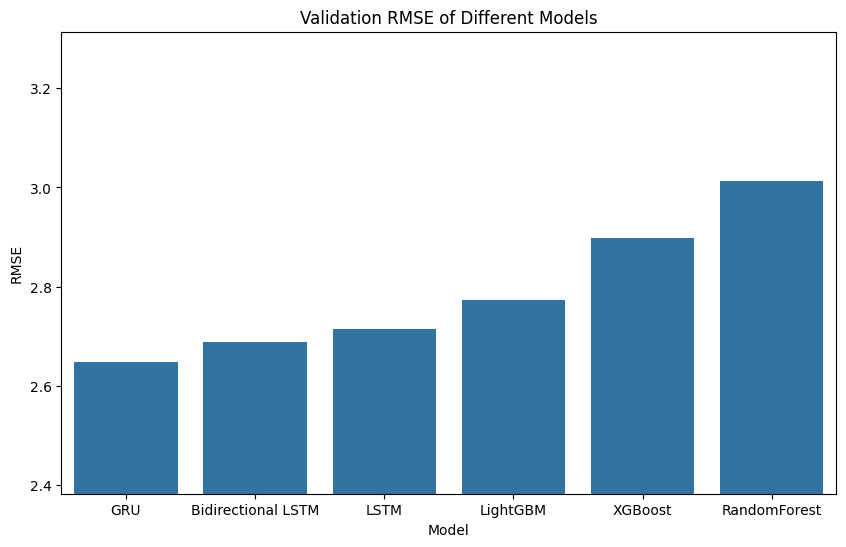

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to hold the RMSE values for each model
model_performance = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost', 'RandomForest', 'LSTM', 'GRU', 'Bidirectional LSTM'],
    'RMSE': [rmse_lgbm, rmse_xgb, rmse_rf, rmse_lstm, rmse_gru, rmse_bi_lstm]
})

# Sort by RMSE for better visualization
model_performance = model_performance.sort_values(by='RMSE')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=model_performance)
plt.title('Validation RMSE of Different Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim(model_performance['RMSE'].min() * 0.9, model_performance['RMSE'].max() * 1.1) # Adjust y-axis limits for better view
plt.show()

In [42]:
# Save the trained GRU model
model_gru.save("gru_model.keras")
print("GRU model saved successfully!")

GRU model saved successfully!


## Dynamic Pricing Engine

6066/6066 ━━━━━━━━━━━━━━━━━━━━ 5s 760us/step
Total Actual Revenue: $4,345,221.51
Total Estimated Revenue: $4,721,397.25
Revenue Change: $376,175.74
Revenue Change %: 8.66%


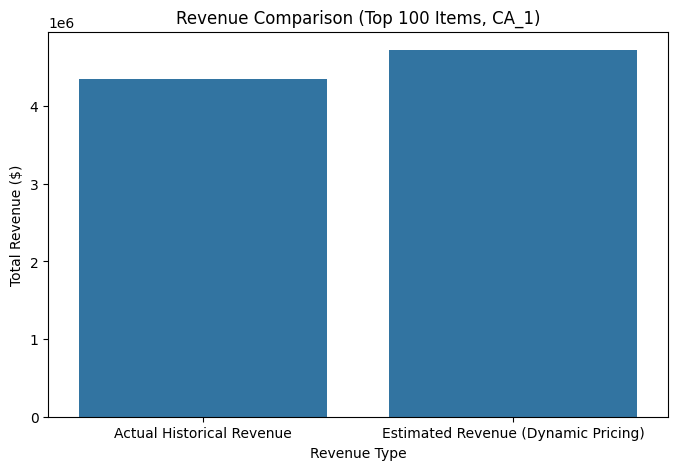

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# --- Configuration ---
STORE_ID = "CA_1"
NUM_TOP_ITEMS = 100
PRICE_ADJUSTMENT_RANGE_FULL = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
PRICE_FLOOR_RATIO = 0.8   # Minimum 80% of base price
BASE_ELASTICITY = -1.5
MIN_ELASTICITY = -0.2       # For low-demand items
SYNTHETIC_PRICE_MULTIPLIER = 1.0  # Use average historical price as base

# --- Load Data ---
df_ca1_all = pd.read_pickle(f"merged_{STORE_ID}.pkl")
df_ca1_all["d_num"] = df_ca1_all["d"].str[2:].astype(int)

# Load trained GRU model
model_gru = load_model("gru_model.keras")

# --- Identify Top Items ---
sales_eval_store = sales_eval[sales_eval["store_id"] == STORE_ID].copy()
date_cols = [c for c in sales_eval_store.columns if c.startswith("d_")]
sales_eval_store["total_sales"] = sales_eval_store[date_cols].sum(axis=1)
top_100_items = sales_eval_store.sort_values("total_sales", ascending=False).head(NUM_TOP_ITEMS)[["id", "total_sales"]]
df_ca1_top100_merged = df_ca1_all[df_ca1_all["id"].isin(top_100_items["id"])].copy()

# --- Feature Engineering ---
df_ca1_top100_merged = df_ca1_top100_merged.sort_values(["id", "d_num"]).reset_index(drop=True)
lags = [7, 14, 28]
rolling_windows = [7, 28]
grouped_top100 = df_ca1_top100_merged.groupby("id", observed=False)

for lag in lags:
    df_ca1_top100_merged[f"sales_lag{lag}"] = grouped_top100["sales"].shift(lag)
for w in rolling_windows:
    df_ca1_top100_merged[f"sales_rollmean{w}"] = grouped_top100["sales"].shift(1).rolling(w, min_periods=1).mean()

feature_cols = [f"sales_lag{x}" for x in lags] + [f"sales_rollmean{x}" for x in rolling_windows]
df_ca1_top100_merged[feature_cols] = df_ca1_top100_merged[feature_cols].fillna(0)

# --- Predict Demand using GRU ---
X_predict = df_ca1_top100_merged[feature_cols].values.reshape((df_ca1_top100_merged.shape[0], 1, len(feature_cols)))
predicted_demand = model_gru.predict(X_predict)
df_ca1_top100_merged["predicted_demand_raw"] = predicted_demand.flatten()

# --- Scale Predicted Demand to Historical Average ---
# Compute historical average sales per item
item_avg_sales = df_ca1_top100_merged.groupby("id")["sales"].mean()
# Compute predicted average demand per item
item_predicted_avg = df_ca1_top100_merged.groupby("id")["predicted_demand_raw"].mean()

# Scaling factor = historical / predicted
scaling_factor = (item_avg_sales / item_predicted_avg).replace([np.inf, -np.inf, np.nan], 1.0)

# Apply scaling
df_ca1_top100_merged["predicted_demand"] = df_ca1_top100_merged.apply(
    lambda row: max(row["predicted_demand_raw"] * scaling_factor.get(row["id"], 1.0), 0), axis=1
)

# --- Handle Missing/Zero Sell Prices ---
item_avg_prices = df_ca1_top100_merged.groupby("id")["sell_price"].mean()
def fill_synthetic_price(row):
    if pd.isna(row["sell_price"]) or row["sell_price"] <= 0:
        base_price = item_avg_prices.get(row["id"], 1)
        return base_price * SYNTHETIC_PRICE_MULTIPLIER
    return row["sell_price"]
df_ca1_top100_merged["sell_price"] = df_ca1_top100_merged.apply(fill_synthetic_price, axis=1)

# --- Dynamic Pricing Optimization ---
def calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity):
    return predicted_demand * ((candidate_price / current_price) ** elasticity) if current_price > 0 else predicted_demand

def calculate_expected_revenue(adjusted_demand, candidate_price):
    return max(adjusted_demand * candidate_price, 0)

df_optimal_prices = []

for index, row in df_ca1_top100_merged.iterrows():
    current_price = row["sell_price"]
    predicted_demand = row["predicted_demand"]

    # Low-demand items get restricted price adjustments and lower elasticity
    if predicted_demand < 1:
        PRICE_ADJUSTMENT_RANGE = [0, 0.05, 0.10]
        elasticity = MIN_ELASTICITY
    else:
        PRICE_ADJUSTMENT_RANGE = PRICE_ADJUSTMENT_RANGE_FULL
        elasticity = BASE_ELASTICITY

    best_revenue = -np.inf
    optimal_price = current_price

    for adjustment in PRICE_ADJUSTMENT_RANGE:
        candidate_price = current_price * (1 + adjustment)
        candidate_price = max(candidate_price, current_price * PRICE_FLOOR_RATIO)

        adjusted_demand = calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity)
        adjusted_demand = max(adjusted_demand, 0)
        expected_revenue = calculate_expected_revenue(adjusted_demand, candidate_price)

        if expected_revenue > best_revenue:
            best_revenue = expected_revenue
            optimal_price = candidate_price

    df_optimal_prices.append({
        "id": row["id"],
        "date": row["date"],
        "current_price": current_price,
        "predicted_demand": predicted_demand,
        "recommended_price": optimal_price,
        "expected_revenue": best_revenue
    })

df_optimal_prices = pd.DataFrame(df_optimal_prices)

# --- Revenue Comparison ---
df_eval_elasticity = pd.merge(
    df_ca1_top100_merged,
    df_optimal_prices,
    on=["id", "date", "predicted_demand"],
    how="left"
)
df_eval_elasticity["actual_revenue_historical"] = df_eval_elasticity["sales"] * df_eval_elasticity["sell_price"]

total_actual_revenue_historical = df_eval_elasticity["actual_revenue_historical"].sum()
total_estimated_revenue_elasticity = df_eval_elasticity["expected_revenue"].sum()
revenue_change_elasticity = total_estimated_revenue_elasticity - total_actual_revenue_historical
revenue_change_percentage_elasticity = (revenue_change_elasticity / total_actual_revenue_historical) * 100 if total_actual_revenue_historical > 0 else 0

print(f"Total Actual Revenue: ${total_actual_revenue_historical:,.2f}")
print(f"Total Estimated Revenue: ${total_estimated_revenue_elasticity:,.2f}")
print(f"Revenue Change: ${revenue_change_elasticity:,.2f}")
print(f"Revenue Change %: {revenue_change_percentage_elasticity:.2f}%")

# --- Visualization ---
revenue_comparison_eval_data = pd.DataFrame({
    'Revenue Type': ['Actual Historical Revenue', 'Estimated Revenue (Dynamic Pricing)'],
    'Total Revenue': [total_actual_revenue_historical, total_estimated_revenue_elasticity]
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Revenue Type', y='Total Revenue', data=revenue_comparison_eval_data)
plt.title(f'Revenue Comparison (Top {NUM_TOP_ITEMS} Items, {STORE_ID})')
plt.ylabel('Total Revenue ($)')
plt.show()


184941/184941 ━━━━━━━━━━━━━━━━━━━━ 151s 815us/step
Total Actual Revenue: $22,954,283.79
Total Estimated Revenue: $24,518,846.41
Revenue Change: $1,564,562.63
Revenue Change %: 6.82%


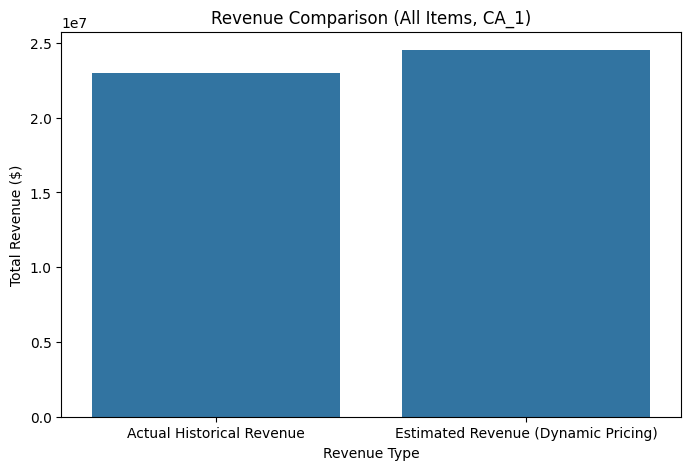

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# --- Configuration ---
STORE_ID = "CA_1"
PRICE_ADJUSTMENT_RANGE_FULL = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
PRICE_FLOOR_RATIO = 0.8
BASE_ELASTICITY = -1.5
MIN_ELASTICITY = -0.2
SYNTHETIC_PRICE_MULTIPLIER = 1.0

# --- Load Data ---
df_ca1_all = pd.read_pickle(f"merged_{STORE_ID}.pkl")
df_ca1_all["d_num"] = df_ca1_all["d"].str[2:].astype(int)

# Load trained GRU model
model_gru = load_model("gru_model.keras")

# --- Feature Engineering for All Items ---
df_ca1_all = df_ca1_all.sort_values(["id", "d_num"]).reset_index(drop=True)
lags = [7, 14, 28]
rolling_windows = [7, 28]
grouped_all = df_ca1_all.groupby("id", observed=False)

for lag in lags:
    df_ca1_all[f"sales_lag{lag}"] = grouped_all["sales"].shift(lag)
for w in rolling_windows:
    df_ca1_all[f"sales_rollmean{w}"] = grouped_all["sales"].shift(1).rolling(w, min_periods=1).mean()

feature_cols = [f"sales_lag{x}" for x in lags] + [f"sales_rollmean{x}" for x in rolling_windows]
df_ca1_all[feature_cols] = df_ca1_all[feature_cols].fillna(0)

# --- Predict Demand for All Items ---
X_predict = df_ca1_all[feature_cols].values.reshape((df_ca1_all.shape[0], 1, len(feature_cols)))
predicted_demand = model_gru.predict(X_predict)
df_ca1_all["predicted_demand_raw"] = predicted_demand.flatten()

# --- Scale Predicted Demand to Historical Average ---
item_avg_sales = df_ca1_all.groupby("id")["sales"].mean()
item_predicted_avg = df_ca1_all.groupby("id")["predicted_demand_raw"].mean()
scaling_factor = (item_avg_sales / item_predicted_avg).replace([np.inf, -np.inf, np.nan], 1.0)
df_ca1_all["predicted_demand"] = df_ca1_all.apply(
    lambda row: max(row["predicted_demand_raw"] * scaling_factor.get(row["id"], 1.0), 0), axis=1
)

# --- Handle Missing/Zero Sell Prices ---
item_avg_prices = df_ca1_all.groupby("id")["sell_price"].mean()
def fill_synthetic_price(row):
    if pd.isna(row["sell_price"]) or row["sell_price"] <= 0:
        base_price = item_avg_prices.get(row["id"], 1)
        return base_price * SYNTHETIC_PRICE_MULTIPLIER
    return row["sell_price"]
df_ca1_all["sell_price"] = df_ca1_all.apply(fill_synthetic_price, axis=1)

# --- Dynamic Pricing Optimization for All Items ---
def calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity):
    return predicted_demand * ((candidate_price / current_price) ** elasticity) if current_price > 0 else predicted_demand

def calculate_expected_revenue(adjusted_demand, candidate_price):
    return max(adjusted_demand * candidate_price, 0)

df_optimal_prices = []

for index, row in df_ca1_all.iterrows():
    current_price = row["sell_price"]
    predicted_demand = row["predicted_demand"]

    if predicted_demand < 1:
        PRICE_ADJUSTMENT_RANGE = [0, 0.05, 0.10]
        elasticity = MIN_ELASTICITY
    else:
        PRICE_ADJUSTMENT_RANGE = PRICE_ADJUSTMENT_RANGE_FULL
        elasticity = BASE_ELASTICITY

    best_revenue = -np.inf
    optimal_price = current_price

    for adjustment in PRICE_ADJUSTMENT_RANGE:
        candidate_price = current_price * (1 + adjustment)
        candidate_price = max(candidate_price, current_price * PRICE_FLOOR_RATIO)

        adjusted_demand = calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity)
        adjusted_demand = max(adjusted_demand, 0)
        expected_revenue = calculate_expected_revenue(adjusted_demand, candidate_price)

        if expected_revenue > best_revenue:
            best_revenue = expected_revenue
            optimal_price = candidate_price

    df_optimal_prices.append({
        "id": row["id"],
        "date": row["date"],
        "current_price": current_price,
        "predicted_demand": predicted_demand,
        "recommended_price": optimal_price,
        "expected_revenue": best_revenue
    })

df_optimal_prices = pd.DataFrame(df_optimal_prices)

# --- Revenue Comparison ---
df_eval_elasticity = pd.merge(
    df_ca1_all,
    df_optimal_prices,
    on=["id", "date", "predicted_demand"],
    how="left"
)
df_eval_elasticity["actual_revenue_historical"] = df_eval_elasticity["sales"] * df_eval_elasticity["sell_price"]

total_actual_revenue_historical = df_eval_elasticity["actual_revenue_historical"].sum()
total_estimated_revenue_elasticity = df_eval_elasticity["expected_revenue"].sum()
revenue_change_elasticity = total_estimated_revenue_elasticity - total_actual_revenue_historical
revenue_change_percentage_elasticity = (revenue_change_elasticity / total_actual_revenue_historical) * 100 if total_actual_revenue_historical > 0 else 0

print(f"Total Actual Revenue: ${total_actual_revenue_historical:,.2f}")
print(f"Total Estimated Revenue: ${total_estimated_revenue_elasticity:,.2f}")
print(f"Revenue Change: ${revenue_change_elasticity:,.2f}")
print(f"Revenue Change %: {revenue_change_percentage_elasticity:.2f}%")

# --- Visualization ---
revenue_comparison_eval_data = pd.DataFrame({
    'Revenue Type': ['Actual Historical Revenue', 'Estimated Revenue (Dynamic Pricing)'],
    'Total Revenue': [total_actual_revenue_historical, total_estimated_revenue_elasticity]
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Revenue Type', y='Total Revenue', data=revenue_comparison_eval_data)
plt.title(f'Revenue Comparison (All Items, {STORE_ID})')
plt.ylabel('Total Revenue ($)')
plt.show()


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import gc
import os # Import os for listing files

# --- Configuration ---
# Moved inside the function to be store-specific if needed, or keep outside if global
NUM_TOP_ITEMS = 100  # Increased number of top items
PRICE_ADJUSTMENT_RANGE_FULL = [-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15]
PRICE_FLOOR_RATIO = 0.8   # Minimum 80% of base price
BASE_ELASTICITY = -1.5
MIN_ELASTICITY = -0.2       # For low-demand items
SYNTHETIC_PRICE_MULTIPLIER = 1.0  # Use average historical price as base

# --- Define the Pricing Pipeline Function ---
def run_pricing_pipeline_select_file():
    print("\n--- Running Dynamic Pricing Pipeline ---")

    # --- Select Data File ---
    try:
        print("Available merged data files in Current Dir:")
        # List all .pkl files in the /content/ directory
        available_files = [f for f in os.listdir('processed') if f.endswith('.pkl') and f.startswith('merged_')]
        if not available_files:
            print("No merged data files found in Current Dir.")
            return

        for i, file_name in enumerate(available_files):
            print(f"{i+1}: {file_name}")

        while True:
            try:
                choice = int(input(f"Please enter the number of the file you want to use (1-{len(available_files)}): "))
                if 1 <= choice <= len(available_files):
                    selected_file_name = available_files[choice - 1]
                    break
                else:
                    print("Invalid choice. Please enter a number within the range.")
            except ValueError:
                print("Invalid input. Please enter a number.")

        print(f"Selected file: '{selected_file_name}'")

        # Infer store ID from the filename (assuming format merged_STORE_ID.pkl)
        try:
            store_id = selected_file_name.split('_')[1].split('.')[0]
            print(f"Inferred Store ID: {store_id}")
        except IndexError:
             print("Could not infer Store ID from filename. Please ensure the filename is in the format 'merged_STORE_ID.pkl'")
             store_id = "Unknown_Store" # Assign a default or handle as error


        df_store_all = pd.read_pickle(os.path.join('processed', selected_file_name))
        df_store_all["d_num"] = df_store_all["d"].str[2:].astype(int)
        print("Data loaded successfully.")
    except Exception as e:
        print(f"Error during data file selection or loading: {e}")
        return


    # Load trained GRU model
    try:
        model_gru = load_model("gru_model.keras")
        print("GRU model loaded successfully.")
    except Exception as e:
        print(f"Error loading GRU model: {e}")
        return

    # --- Identify Top Items ---
    try:
        # Load sales_train_evaluation.csv to get total sales for item ranking
        # This assumes sales_train_evaluation.csv is still available in the environment
        sales_eval_path = "sales_train_evaluation.csv"
        if not os.path.exists(sales_eval_path):
             print(f"Error: Required file '{sales_eval_path}' not found. Please ensure it's in the directory.")
             return

        sales_eval = pd.read_csv(sales_eval_path)
        sales_eval_store = sales_eval[sales_eval["store_id"] == store_id].copy()

        if sales_eval_store.empty:
             print(f"Warning: No sales data found for store ID '{store_id}' in sales_train_evaluation.csv. Cannot identify top items.")
             # Attempt to proceed with all items if no store-specific sales_eval data is found
             print("Proceeding with all items in the selected file for this store.")
             df_store_top_merged = df_store_all.copy()
             NUM_TOP_ITEMS_ACTUAL = len(df_store_top_merged["id"].unique())
             print(f"Using {NUM_TOP_ITEMS_ACTUAL} items for analysis.")
        else:
            date_cols = [c for c in sales_eval_store.columns if c.startswith("d_")]
            sales_eval_store["total_sales"] = sales_eval_store[date_cols].sum(axis=1)
            top_items = sales_eval_store.sort_values("total_sales", ascending=False).head(NUM_TOP_ITEMS)["id"].tolist()
            df_store_top_merged = df_store_all[df_store_all["id"].isin(top_items)].copy()
            NUM_TOP_ITEMS_ACTUAL = len(top_items)
            print(f"Identified top {NUM_TOP_ITEMS_ACTUAL} items.")

        del sales_eval, sales_eval_store
        gc.collect()
    except Exception as e:
        print(f"Error identifying top items: {e}")
        return


    # --- Feature Engineering ---
    try:
        df_store_top_merged = df_store_top_merged.sort_values(["id", "d_num"]).reset_index(drop=True)
        lags = [7, 14, 28]
        rolling_windows = [7, 28]
        grouped_top = df_store_top_merged.groupby("id", observed=False)

        for lag in lags:
            df_store_top_merged[f"sales_lag{lag}"] = grouped_top["sales"].shift(lag)
        for w in rolling_windows:
            col_name = f"sales_rollmean{w}"
            # Ensure the column exists before calculating rolling mean
            if 'sales' in df_store_top_merged.columns:
                df_store_top_merged[col_name] = (
                    grouped_top["sales"]
                    .shift(1)                      # shift by 1 to avoid including current day
                    .rolling(w, min_periods=1)
                    .mean()
                )
            else:
                df_store_top_merged[col_name] = 0.0 # Or handle as appropriate if 'sales' is missing


        feature_cols = [f"sales_lag{x}" for x in lags] + [f"sales_rollmean{x}" for x in rolling_windows]
        # Ensure all feature_cols exist before filling NaNs
        existing_feature_cols = [col for col in feature_cols if col in df_store_top_merged.columns]
        df_store_top_merged[existing_feature_cols] = df_store_top_merged[existing_feature_cols].fillna(0)

        print("Feature engineering complete.")
    except Exception as e:
        print(f"Error during feature engineering: {e}")
        return

    # --- Predict Demand using GRU ---
    try:
        # Ensure feature_cols are present in the DataFrame before selecting
        missing_features = [col for col in feature_cols if col not in df_store_top_merged.columns]
        if missing_features:
             print(f"Error: Missing feature columns after engineering: {missing_features}")
             return

        X_predict = df_store_top_merged[feature_cols].values.reshape((df_store_top_merged.shape[0], 1, len(feature_cols)))
        predicted_demand = model_gru.predict(X_predict)
        df_store_top_merged["predicted_demand_raw"] = predicted_demand.flatten()
        print("Demand prediction complete.")

        # --- Scale Predicted Demand to Historical Average ---
        item_avg_sales = df_store_top_merged.groupby("id")["sales"].mean()
        item_predicted_avg = df_store_top_merged.groupby("id")["predicted_demand_raw"].mean()

        # Scaling factor = historical / predicted
        # Handle cases where item_predicted_avg might be zero or item_avg_sales is zero
        scaling_factor = (item_avg_sales / item_predicted_avg)
        scaling_factor = scaling_factor.replace([np.inf, -np.inf], np.nan).fillna(1.0) # Replace inf with NaN and fill NaN with 1.0


        # Apply scaling
        df_store_top_merged["predicted_demand"] = df_store_top_merged.apply(
            lambda row: max(row["predicted_demand_raw"] * scaling_factor.get(row["id"], 1.0), 0), axis=1
        )
        print("Predicted demand scaled.")
    except Exception as e:
        print(f"Error during demand prediction or scaling: {e}")
        return


    # --- Handle Missing/Zero Sell Prices ---
    try:
        # Calculate item_avg_prices only for the items in df_store_top_merged
        item_avg_prices = df_store_top_merged.groupby("id")["sell_price"].mean()

        def fill_synthetic_price(row):
            if pd.isna(row["sell_price"]) or row["sell_price"] <= 0:
                # Use the average price calculated only for the top items
                base_price = item_avg_prices.get(row["id"], 1.0) # Default to 1.0 if item not in calculated averages
                return base_price * SYNTHETIC_PRICE_MULTIPLIER
            return row["sell_price"]
        df_store_top_merged["sell_price"] = df_store_top_merged.apply(fill_synthetic_price, axis=1)
        print("Missing/zero sell prices handled.")
    except Exception as e:
        print(f"Error handling sell prices: {e}")
        return

    # --- Dynamic Pricing Optimization ---
    try:
        def calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity):
            # Ensure current_price is not zero to avoid division by zero
            if current_price <= 0:
                 return predicted_demand  # Or handle as appropriate for your case
            # Apply elasticity formula
            adjusted_demand = predicted_demand * ((candidate_price / current_price) ** elasticity)
            return adjusted_demand

        def calculate_expected_revenue(adjusted_demand, candidate_price):
            return max(adjusted_demand * candidate_price, 0) # Ensure non-negative revenue


        df_optimal_prices = []

        for index, row in df_store_top_merged.iterrows():
            current_price = row["sell_price"]
            predicted_demand = row["predicted_demand"]

            # Low-demand items get restricted price adjustments and lower elasticity
            # Using a more robust check for low predicted demand
            if predicted_demand < 0.5: # Threshold can be adjusted
                PRICE_ADJUSTMENT_RANGE = [0, 0.05, 0.10] # Offer discounts or no change
                elasticity = MIN_ELASTICITY
            else:
                PRICE_ADJUSTMENT_RANGE = PRICE_ADJUSTMENT_RANGE_FULL # Full range of adjustments
                elasticity = BASE_ELASTICITY

            best_revenue = -np.inf
            optimal_price = current_price

            for adjustment in PRICE_ADJUSTMENT_RANGE:
                candidate_price = current_price * (1 + adjustment)
                candidate_price = max(candidate_price, current_price * PRICE_FLOOR_RATIO) # Apply price floor

                adjusted_demand = calculate_adjusted_demand(current_price, predicted_demand, candidate_price, elasticity)
                adjusted_demand = max(adjusted_demand, 0) # Ensure non-negative demand
                expected_revenue = calculate_expected_revenue(adjusted_demand, candidate_price)

                if expected_revenue > best_revenue:
                    best_revenue = expected_revenue
                    optimal_price = candidate_price

            df_optimal_prices.append({
                "id": row["id"],
                "date": row["date"],
                "current_price": current_price,
                "predicted_demand": predicted_demand,
                "recommended_price": optimal_price,
                "expected_revenue": best_revenue
            })

        df_optimal_prices = pd.DataFrame(df_optimal_prices)
        print("Dynamic pricing optimization complete.")
    except Exception as e:
        print(f"Error during dynamic pricing optimization: {e}")
        return

    # --- Revenue Comparison ---
    try:
        # Ensure the merge keys exist in both dataframes
        merge_keys = ["id", "date", "predicted_demand"]
        if not all(key in df_store_top_merged.columns for key in merge_keys):
             print(f"Error: Missing merge keys in df_store_top_merged: {list(set(merge_keys) - set(df_store_top_merged.columns))}")
             return
        if not all(key in df_optimal_prices.columns for key in merge_keys):
             print(f"Error: Missing merge keys in df_optimal_prices: {list(set(merge_keys) - set(df_optimal_prices.columns))}")
             return


        df_eval_elasticity = pd.merge(
            df_store_top_merged,
            df_optimal_prices,
            on=merge_keys, # Merge on multiple keys
            how="left"
        )
        df_eval_elasticity["actual_revenue_historical"] = df_eval_elasticity["sales"] * df_eval_elasticity["sell_price"]

        total_actual_revenue_historical = df_eval_elasticity["actual_revenue_historical"].sum()
        total_estimated_revenue_elasticity = df_eval_elasticity["expected_revenue"].sum()
        revenue_change_elasticity = total_estimated_revenue_elasticity - total_actual_revenue_historical
        revenue_change_percentage_elasticity = (revenue_change_elasticity / total_actual_revenue_historical) * 100 if total_actual_revenue_historical > 0 else 0

        print(f"\n--- Revenue Impact for Store: {store_id} ---")
        print(f"Total Actual Revenue: ${total_actual_revenue_historical:,.2f}")
        print(f"Total Estimated Revenue: ${total_estimated_revenue_elasticity:,.2f}")
        print(f"Revenue Change: ${revenue_change_elasticity:,.2f}")
        print(f"Revenue Change %: {revenue_change_percentage_elasticity:.2f}%")

        # --- Visualization ---
        revenue_comparison_data = pd.DataFrame({
            'Revenue Type': ['Actual Historical Revenue', 'Estimated Revenue (Dynamic Pricing)'],
            'Total Revenue': [total_actual_revenue_historical, total_estimated_revenue_elasticity]
        })
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Revenue Type', y='Total Revenue', data=revenue_comparison_data)
        plt.title(f'Revenue Comparison (Top {NUM_TOP_ITEMS_ACTUAL} Items, {store_id})')
        plt.ylabel('Total Revenue ($)')
        plt.show()
        print("Revenue comparison plot generated.")
    except Exception as e:
        print(f"Error during revenue comparison or visualization: {e}")
        return

    # --- Cleanup ---
    del df_store_all, df_store_top_merged, df_optimal_prices, df_eval_elasticity
    gc.collect()
    print(f"Cleanup complete for store: {store_id}")


--- Running Dynamic Pricing Pipeline ---
Available merged data files in Current Dir:
1: merged_CA_1.pkl
2: merged_CA_2.pkl
3: merged_CA_3.pkl
4: merged_CA_4.pkl
5: merged_TX_1.pkl
6: merged_TX_2.pkl
7: merged_TX_3.pkl
8: merged_WI_1.pkl
9: merged_WI_2.pkl
10: merged_WI_3.pkl
Selected file: 'merged_WI_1.pkl'
Inferred Store ID: WI
Data loaded successfully.
GRU model loaded successfully.
Proceeding with all items in the selected file for this store.
Using 3049 items for analysis.
Feature engineering complete.
184941/184941 ━━━━━━━━━━━━━━━━━━━━ 242s 1ms/step
Demand prediction complete.
Predicted demand scaled.
Missing/zero sell prices handled.
Dynamic pricing optimization complete.

--- Revenue Impact for Store: WI ---
Total Actual Revenue: $15,107,433.81
Total Estimated Revenue: $15,988,804.10
Revenue Change: $881,370.30
Revenue Change %: 5.83%


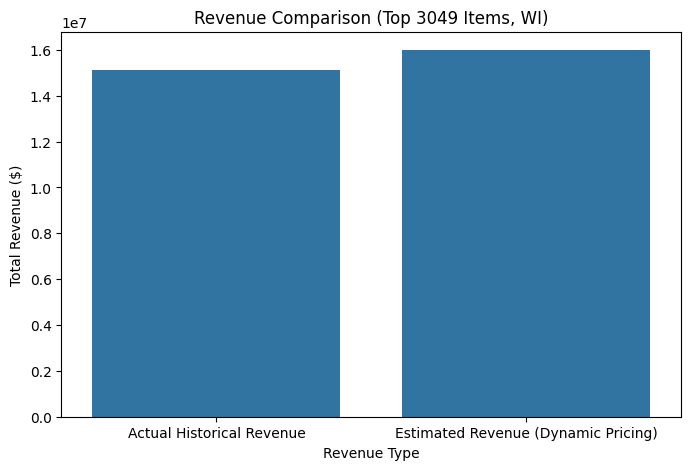

Revenue comparison plot generated.
Cleanup complete for store: WI


In [54]:
# --- Run the Pipeline ---
run_pricing_pipeline_select_file() # Keep the definition, but run it in a separate cell